<a href="https://colab.research.google.com/github/eadamsRU/GIS_RU/blob/main/PS3_11072024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PS3**

# **SCOPE**

* Food availbility
  * Food Deserts
    - [can mention how Camden is known as a food desert]
  * Healthy Grocery/ Food Stores
    - contrast with fast food locations
  * Farmers markets
    - usda would be a good resource
  * General Grocery Store Data
    - see average prices for a typical family for pricing and tyoes of foods
* Exercise
  * Obesity
    - obesity rates
    - diabetes populations
    - heart disease populations
      * Source: "County Health Rankings & Roadmaps, CDC, or state health agencies."
  * Physically Inactive Persons
    - Local public gyms in counties
    * physical activity levels
* Diet
  * healthy food index
    - Nutritional intake surveys
    - Any way to see population of those with dietary restrictions (vegetarian, vegan, gluten-free, etc.)
  * Mcdonalds dataset for all of NJ
    - Counties to look more into Somerset, Essex, Camden
* Census Data
  * Data such as population, income, education level, unemployment rates, and how many businesses there are in each county.
* Fast Food Density
  * Want to see if there is some type of coorelation of fast food locations and obesity rates and general health/income levels.
*
*

Counties to look more into
Somerset, Hudson (Essex), Camden

population density for each county


Camden:
This will be our baseline county to look at against all others within the state, and to see something that is sort of in the middle and also right outside a major city, Philadelphia

Somerset:
This is the richest median houssehold income in NJ seems to be inbetween Camden and Hudson (Essex) county. So we can see our sample data and see if there is anytthing that correlates between Mcdonalds locations and our Census data


Hudson:
Similiar to us researching Camden county to see a county right outdside of a major citym we can see this if there is anyt difference between people outside of NYC

CAN YOU ADD THIS FOR THE FUTURE

Do individual index make bold or different color to shout out a

Can do this in the future against farm lands in each county

I have added camden county dataset for Mcdonalds locations, need to do the same for Somerset, Hudson(Essex) county.

# **CODE**

## Let's get the setup

In [1]:
%%capture
!pip install geopandas==1.0.1
!pip install mapclassify

In [2]:
import os, zipfile #basics
import pandas as pd #data management
import matplotlib.pyplot as plt #vis

import geopandas as gpd #gis/maps: a sister of pandas; does the job;
#tho not as fancy-interactive as folium or leafmap https://geopandas.org/

import mapclassify #need for thematic map classification

#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from google.colab import files #to download from colab onto hd

#from google.colab import data_table
#data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )
from google.colab.data_table import DataTable
DataTable.max_columns = 250

In [3]:
#!python --version
gpd.__version__

'1.0.1'

## Shapefile(s)

In [4]:
#i found one and reposted on my website, download it onto colab:
! wget -q -O nj-counties.zip https://docs.google.com/uc?id=1xJDhcRCkgv7k4tNCa72Oog5bohV6dTB2&export=download

zip_ref = zipfile.ZipFile('nj-counties.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping
njC0=gpd.read_file('nj_counties.shp') #load the shapefile with gpd as njC

In [5]:
njC0.dtypes #with geopandas can do stuff like with pandas :)
#njC0.info()

,0
COUNTY,object
COUNTY_LAB,object
CO,object
GNIS_NAME,object
GNIS,object
FIPSSTCO,object
FIPSCO,object
ACRES,float64
SQ_MILES,float64
POP2010,int64


In [6]:
print(njC0)

        COUNTY         COUNTY_LAB   CO             GNIS_NAME    GNIS FIPSSTCO  \
0     ATLANTIC    Atlantic County  ATL    County of Atlantic  882270    34001   
1       BERGEN      Bergen County  BER      County of Bergen  882271    34003   
2   BURLINGTON  Burlington County  BUR  County of Burlington  882272    34005   
3       CAMDEN      Camden County  CAM      County of Camden  882273    34007   
4     CAPE MAY    Cape May County  CAP    County of Cape May  882274    34009   
5   CUMBERLAND  Cumberland County  CUM  County of Cumberland  882275    34011   
6        ESSEX       Essex County  ESS       County of Essex  882276    34013   
7   GLOUCESTER  Gloucester County  GLO  County of Gloucester  882277    34015   
8       HUDSON      Hudson County  HUD      County of Hudson  882278    34017   
9    HUNTERDON   Hunterdon County  HUN   County of Hunterdon  882228    34019   
10      MERCER      Mercer County  MER      County of Mercer  882229    34021   
11    MONMOUTH    Monmouth C

## Getting our datasets

We store our dataframe as whatever variable.
Using pandas library we can read in either csv or xlsx file. (In this case I use pd.read_csv to read in a FORMATTED csv file that I upload to my github). When I say formatted, I mean it is all cleaned, no blank records, everything is transposed and columns and rows pandas will be able to be read easily.
* You can also use google drive but to keep it simple I'll do github (version control plus simpler)

In [7]:
dietExerciseIndex = pd.read_csv('https://github.com/eadamsRU/GIS_RU/raw/refs/heads/main/diet%20exercise%20formatted%2009262024%20-%202%20-%20Sheet1.csv')

In [8]:
dietExerciseIndex.dtypes

,0
County,object
Healthy Food,float64
Exercise Opportunities,float64
Obese Persons,float64
Physically Inactive Persons,float64
Children Eligible for Free Lunch,float64


This below code is good to elimiate any blank spaces that may still be there that the eye does not catch, good practice to include something like this.

In [9]:
dietExerciseIndex.columns = dietExerciseIndex.columns.str.strip()


Incredibly important step below to make sure that the variable that we found to join on our shapefile matches EXACTLY with our file. (CASE_sensitive)

In [10]:
dietExerciseIndex.rename(columns={'County': 'COUNTY'}, inplace=True)

I also found for my data do the same with all other columns you plan on using. This will come into play later

In [11]:
dietExerciseIndex.rename(columns={'Healthy Food': 'HEALTHY FOOD'}, inplace=True)


In [12]:
dietExerciseIndex.rename(columns={'Obese Persons': 'OBESE PERSONS'}, inplace=True)


In [13]:
dietExerciseIndex.rename(columns={'Physically Inactive Persons': 'PHYSICALLY INACTIVE PERSONS'}, inplace=True)


In [14]:
dietExerciseIndex.rename(columns={'Children Eligible for Free Lunch': 'CHILDREN ELIGIBLE FOR FREE LUNCH'}, inplace=True)


***VERY IMPORTANT***
THIS IS HOW YOU CONVERT DATATYPES

In [15]:
# If you want to convert multiple columns
columns_to_convert = ['HEALTHY FOOD', 'Exercise Opportunities', 'OBESE PERSONS', 'PHYSICALLY INACTIVE PERSONS', 'CHILDREN ELIGIBLE FOR FREE LUNCH']  # replace with your actual column names
dietExerciseIndex[columns_to_convert] = dietExerciseIndex[columns_to_convert].astype('int64')

In [16]:
dietExerciseIndex

,COUNTY,HEALTHY FOOD,Exercise Opportunities,OBESE PERSONS,PHYSICALLY INACTIVE PERSONS,CHILDREN ELIGIBLE FOR FREE LUNCH
0,Atlantic County,7,93,32,22,53
1,Bergen County,0,99,22,18,19
2,Burlington County,5,93,30,18,24
3,Camden County,4,93,30,21,43
4,Cape May County,8,89,29,19,35
5,Cumberland County,11,86,35,30,50
6,Essex County,0,99,29,25,52
7,Gloucester County,6,88,32,18,24
8,Hudson County,0,100,25,25,57
9,Hunterdon County,2,91,25,14,10


In [17]:
dietExerciseIndex['COUNTY'] = dietExerciseIndex['COUNTY'].str.upper()


In [18]:
dietExerciseIndex

,COUNTY,HEALTHY FOOD,Exercise Opportunities,OBESE PERSONS,PHYSICALLY INACTIVE PERSONS,CHILDREN ELIGIBLE FOR FREE LUNCH
0,ATLANTIC COUNTY,7,93,32,22,53
1,BERGEN COUNTY,0,99,22,18,19
2,BURLINGTON COUNTY,5,93,30,18,24
3,CAMDEN COUNTY,4,93,30,21,43
4,CAPE MAY COUNTY,8,89,29,19,35
5,CUMBERLAND COUNTY,11,86,35,30,50
6,ESSEX COUNTY,0,99,29,25,52
7,GLOUCESTER COUNTY,6,88,32,18,24
8,HUDSON COUNTY,0,100,25,25,57
9,HUNTERDON COUNTY,2,91,25,14,10


Run this once just to remove the county at the end of the column

In [19]:
#dietExerciseIndex['COUNTY'] = dietExerciseIndex['COUNTY'].str[:-7]


In [20]:
dietExerciseIndex


,COUNTY,HEALTHY FOOD,Exercise Opportunities,OBESE PERSONS,PHYSICALLY INACTIVE PERSONS,CHILDREN ELIGIBLE FOR FREE LUNCH
0,ATLANTIC COUNTY,7,93,32,22,53
1,BERGEN COUNTY,0,99,22,18,19
2,BURLINGTON COUNTY,5,93,30,18,24
3,CAMDEN COUNTY,4,93,30,21,43
4,CAPE MAY COUNTY,8,89,29,19,35
5,CUMBERLAND COUNTY,11,86,35,30,50
6,ESSEX COUNTY,0,99,29,25,52
7,GLOUCESTER COUNTY,6,88,32,18,24
8,HUDSON COUNTY,0,100,25,25,57
9,HUNTERDON COUNTY,2,91,25,14,10


##**Importing the Datasets for PS2**

In [21]:
fastFoodCounty = pd.read_csv('https://github.com/eadamsRU/GIS_RU/raw/refs/heads/main/FastFoodByCountyFormatted%20-%20Sheet1.csv')

In [22]:
fastFoodCounty.dtypes

,0
COUNTY,object
FAST FOOD RESTAURANTS 2011 COUNT,int64
FAST FOOD RESTAURANTS 2016 COUNT,int64
FAST FOOD RESTAURANTS PERCENTAGE CHANGE 2011-2016,float64
FAST FOOD RESTAURANTS PER 1000 POP COUNT 2011,float64
FAST FOOD RESTAURANTS PER 1000 POP COUNT 2016,float64
FAST FOOD RESTAURANTS PER 1000 POP COUNT PERCENTAGE CHANGE 2011-2016,float64


In [23]:
fastFoodCounty.columns = fastFoodCounty.columns.str.strip()

In [24]:
fastFoodCounty.head(1)

,COUNTY,FAST FOOD RESTAURANTS 2011 COUNT,FAST FOOD RESTAURANTS 2016 COUNT,FAST FOOD RESTAURANTS PERCENTAGE CHANGE 2011-2016,FAST FOOD RESTAURANTS PER 1000 POP COUNT 2011,FAST FOOD RESTAURANTS PER 1000 POP COUNT 2016,FAST FOOD RESTAURANTS PER 1000 POP COUNT PERCENTAGE CHANGE 2011-2016
0,ATLANTIC,205,197,-3.902439,0.745165,0.727394,-2.384848


In [25]:
NJCensus = pd.read_csv('https://github.com/eadamsRU/GIS_RU/raw/refs/heads/main/NJ%20CENSUS%20COUNTY%20DATA%20%20FORMATTED%20-%20Sheet1.csv')

In [26]:
NJCensus.dtypes

,0
COUNTY,object
POPULATION,int64
EMPLOYMENT RATE PERCENTAGE,float64
TOTAL EMPLOYER ESTABLISHMENTS,int64
MEDIAN HOUSEHOLD INCOME,int64
TOTAL HOUSING UNITS,int64
TOTAL HOUSEHOLDS,int64
BACHELOR'S DEGREE OR HIGHER PERCENTAGE,float64
WITHOUT HEALTH CARE COVERAGE PERCENTAGE,float64


In [27]:
NJCensus.columns = NJCensus.columns.str.strip()

In [28]:
NJCensus.head(1)

,COUNTY,POPULATION,EMPLOYMENT RATE PERCENTAGE,TOTAL EMPLOYER ESTABLISHMENTS,MEDIAN HOUSEHOLD INCOME,TOTAL HOUSING UNITS,TOTAL HOUSEHOLDS,BACHELOR'S DEGREE OR HIGHER PERCENTAGE,WITHOUT HEALTH CARE COVERAGE PERCENTAGE
0,ATLANTIC,274534,60.1,6145,77053,132038,111158,33.3,6.7


## Merge

In [29]:
njC1 = pd.merge(njC0, dietExerciseIndex, on='COUNTY',how='outer',indicator=True) #(make sure to have njC shapefile from previous sec)


Use this to check if merge was successful and we can read our DF

In [30]:
njC1.head(1)


,COUNTY,COUNTY_LAB,CO,GNIS_NAME,GNIS,FIPSSTCO,FIPSCO,ACRES,SQ_MILES,POP2010,...,REGION,Shape_Leng,Shape_Area,geometry,HEALTHY FOOD,Exercise Opportunities,OBESE PERSONS,PHYSICALLY INACTIVE PERSONS,CHILDREN ELIGIBLE FOR FREE LUNCH,_merge
0,ATLANTIC,Atlantic County,ATL,County of Atlantic,882270,34001,1,390815.404215,610.649069,274549.0,...,COASTAL,650228.153906,1.702385e+10,"POLYGON ((443056.01 311529.77, 443068.44 31152...",NaN,NaN,NaN,NaN,NaN,left_only


Merge with PS2 datasets
 Can make it to indicator = 'merge'

In [31]:
njC2 = pd.merge(njC1, fastFoodCounty, on='COUNTY',how='outer',indicator='merge') #(make sure to have njC shapefile from previous sec)


In [32]:
print(njC2)

               COUNTY         COUNTY_LAB   CO             GNIS_NAME    GNIS  \
0            ATLANTIC    Atlantic County  ATL    County of Atlantic  882270   
1     ATLANTIC COUNTY                NaN  NaN                   NaN     NaN   
2              BERGEN      Bergen County  BER      County of Bergen  882271   
3       BERGEN COUNTY                NaN  NaN                   NaN     NaN   
4          BURLINGTON  Burlington County  BUR  County of Burlington  882272   
5   BURLINGTON COUNTY                NaN  NaN                   NaN     NaN   
6              CAMDEN      Camden County  CAM      County of Camden  882273   
7       CAMDEN COUNTY                NaN  NaN                   NaN     NaN   
8            CAPE MAY    Cape May County  CAP    County of Cape May  882274   
9     CAPE MAY COUNTY                NaN  NaN                   NaN     NaN   
10         CUMBERLAND  Cumberland County  CUM  County of Cumberland  882275   
11  CUMBERLAND COUNTY                NaN  NaN       

Merge the census datasets

In [33]:
njC3 = pd.merge(njC2, NJCensus, on='COUNTY',how='outer',indicator='merge_source') #(make sure to have njC shapefile from previous sec)
# merged_df = df1.merge(df2, on='common_column', how='outer', indicator='merge_source')


In [34]:
njC3.head(1)

,COUNTY,COUNTY_LAB,CO,GNIS_NAME,GNIS,FIPSSTCO,FIPSCO,ACRES,SQ_MILES,POP2010,...,merge,POPULATION,EMPLOYMENT RATE PERCENTAGE,TOTAL EMPLOYER ESTABLISHMENTS,MEDIAN HOUSEHOLD INCOME,TOTAL HOUSING UNITS,TOTAL HOUSEHOLDS,BACHELOR'S DEGREE OR HIGHER PERCENTAGE,WITHOUT HEALTH CARE COVERAGE PERCENTAGE,merge_source
0,ATLANTIC,Atlantic County,ATL,County of Atlantic,882270,34001,1,390815.404215,610.649069,274549.0,...,both,274534.0,60.1,6145.0,77053.0,132038.0,111158.0,33.3,6.7,both


In [35]:
njC3.dtypes

,0
COUNTY,object
COUNTY_LAB,object
CO,object
GNIS_NAME,object
GNIS,object
FIPSSTCO,object
FIPSCO,object
ACRES,float64
SQ_MILES,float64
POP2010,float64


## Convert our Merged DF to int64 from float64

Note: I ran this earlier and the second time I ran it gave errors, maybe just run it the one time and it will be good. Otherwise have to debug this.

In [36]:
# Fill NaN values with a default value (e.g., 0)
njC2['HEALTHY FOOD'] = njC2['HEALTHY FOOD'].fillna(0)

# Now convert to int64
njC2['HEALTHY FOOD'] = njC2['HEALTHY FOOD'].astype('int64')

use print to check the columns, if we have any dupes then we will do a method I found that is convoluted but gets the job done.

* **Need to find a better method for this though**

In [37]:
print(njC2['HEALTHY FOOD'])


0      0
1      7
2      0
3      0
4      0
5      5
6      0
7      4
8      0
9      8
10     0
11    11
12     0
13     0
14     0
15     6
16     0
17     0
18     0
19     2
20     0
21     3
22     0
23     3
24     0
25     4
26     0
27     3
28     0
29     8
30     0
31     1
32     0
33     8
34     0
35     3
36     0
37     5
38     0
39     0
40     0
41     7
Name: HEALTHY FOOD, dtype: int64


In [38]:
# Fill NaN values with a default value (e.g., 0)
njC2['HEALTHY FOOD'] = njC2['HEALTHY FOOD'].fillna(0)

# Now convert to int64
njC2['HEALTHY FOOD'] = njC2['HEALTHY FOOD'].astype('int64')

NEED TO DO THE SAME FOR njC3

## THIS IS THE STEP, RUN JUST ONE TIME
* understand indices and this will help anyone, even if it is not just the top rows are all blank, say it is middle 5-10, you can still use this just change the ranges and will help you out.

In [39]:
#njC2['HEALTHY FOOD'] = njC2['HEALTHY FOOD'].iloc[21:].reset_index(drop=True)

Print to check you have data where you need.

In [40]:
print(njC2)

               COUNTY         COUNTY_LAB   CO             GNIS_NAME    GNIS  \
0            ATLANTIC    Atlantic County  ATL    County of Atlantic  882270   
1     ATLANTIC COUNTY                NaN  NaN                   NaN     NaN   
2              BERGEN      Bergen County  BER      County of Bergen  882271   
3       BERGEN COUNTY                NaN  NaN                   NaN     NaN   
4          BURLINGTON  Burlington County  BUR  County of Burlington  882272   
5   BURLINGTON COUNTY                NaN  NaN                   NaN     NaN   
6              CAMDEN      Camden County  CAM      County of Camden  882273   
7       CAMDEN COUNTY                NaN  NaN                   NaN     NaN   
8            CAPE MAY    Cape May County  CAP    County of Cape May  882274   
9     CAPE MAY COUNTY                NaN  NaN                   NaN     NaN   
10         CUMBERLAND  Cumberland County  CUM  County of Cumberland  882275   
11  CUMBERLAND COUNTY                NaN  NaN       

In [41]:
#njC2.columns = njC2.columns.str.strip()

# **MAPS**

## This is a basic map, good to use as a starting point

DEBUG (WORKS)

In [42]:
print(njC2[njC2.geometry.isnull()])


               COUNTY COUNTY_LAB   CO GNIS_NAME GNIS FIPSSTCO FIPSCO  ACRES  \
1     ATLANTIC COUNTY        NaN  NaN       NaN  NaN      NaN    NaN    NaN   
3       BERGEN COUNTY        NaN  NaN       NaN  NaN      NaN    NaN    NaN   
5   BURLINGTON COUNTY        NaN  NaN       NaN  NaN      NaN    NaN    NaN   
7       CAMDEN COUNTY        NaN  NaN       NaN  NaN      NaN    NaN    NaN   
9     CAPE MAY COUNTY        NaN  NaN       NaN  NaN      NaN    NaN    NaN   
11  CUMBERLAND COUNTY        NaN  NaN       NaN  NaN      NaN    NaN    NaN   
13       ESSEX COUNTY        NaN  NaN       NaN  NaN      NaN    NaN    NaN   
15  GLOUCESTER COUNTY        NaN  NaN       NaN  NaN      NaN    NaN    NaN   
17      HUDSON COUNTY        NaN  NaN       NaN  NaN      NaN    NaN    NaN   
19   HUNTERDON COUNTY        NaN  NaN       NaN  NaN      NaN    NaN    NaN   
21      MERCER COUNTY        NaN  NaN       NaN  NaN      NaN    NaN    NaN   
23   MIDDLESEX COUNTY        NaN  NaN       NaN  NaN

In [43]:
njC2 = njC2[~njC2.geometry.isnull()]

In [44]:
njC2 = njC2.to_crs(epsg=3857)  # Using Web Mercator (EPSG:3857) as an example


In [45]:
njC2.dtypes

,0
COUNTY,object
COUNTY_LAB,object
CO,object
GNIS_NAME,object
GNIS,object
FIPSSTCO,object
FIPSCO,object
ACRES,float64
SQ_MILES,float64
POP2010,float64


In [46]:
print(njC2)

        COUNTY         COUNTY_LAB   CO             GNIS_NAME    GNIS FIPSSTCO  \
0     ATLANTIC    Atlantic County  ATL    County of Atlantic  882270    34001   
2       BERGEN      Bergen County  BER      County of Bergen  882271    34003   
4   BURLINGTON  Burlington County  BUR  County of Burlington  882272    34005   
6       CAMDEN      Camden County  CAM      County of Camden  882273    34007   
8     CAPE MAY    Cape May County  CAP    County of Cape May  882274    34009   
10  CUMBERLAND  Cumberland County  CUM  County of Cumberland  882275    34011   
12       ESSEX       Essex County  ESS       County of Essex  882276    34013   
14  GLOUCESTER  Gloucester County  GLO  County of Gloucester  882277    34015   
16      HUDSON      Hudson County  HUD      County of Hudson  882278    34017   
18   HUNTERDON   Hunterdon County  HUN   County of Hunterdon  882228    34019   
20      MERCER      Mercer County  MER      County of Mercer  882229    34021   
22   MIDDLESEX   Middlesex C

In [47]:
print(njC3[njC3.geometry.isnull()])

               COUNTY COUNTY_LAB   CO GNIS_NAME GNIS FIPSSTCO FIPSCO  ACRES  \
1     ATLANTIC COUNTY        NaN  NaN       NaN  NaN      NaN    NaN    NaN   
3       BERGEN COUNTY        NaN  NaN       NaN  NaN      NaN    NaN    NaN   
5   BURLINGTON COUNTY        NaN  NaN       NaN  NaN      NaN    NaN    NaN   
7       CAMDEN COUNTY        NaN  NaN       NaN  NaN      NaN    NaN    NaN   
9     CAPE MAY COUNTY        NaN  NaN       NaN  NaN      NaN    NaN    NaN   
11  CUMBERLAND COUNTY        NaN  NaN       NaN  NaN      NaN    NaN    NaN   
13       ESSEX COUNTY        NaN  NaN       NaN  NaN      NaN    NaN    NaN   
15  GLOUCESTER COUNTY        NaN  NaN       NaN  NaN      NaN    NaN    NaN   
17      HUDSON COUNTY        NaN  NaN       NaN  NaN      NaN    NaN    NaN   
19   HUNTERDON COUNTY        NaN  NaN       NaN  NaN      NaN    NaN    NaN   
21      MERCER COUNTY        NaN  NaN       NaN  NaN      NaN    NaN    NaN   
23   MIDDLESEX COUNTY        NaN  NaN       NaN  NaN

In [48]:
njC3 = njC3[~njC3.geometry.isnull()]

In [49]:
njC3 = njC3.to_crs(epsg=3857)  # Using Web Mercator (EPSG:3857) as an example

In [50]:
njC3.dtypes

,0
COUNTY,object
COUNTY_LAB,object
CO,object
GNIS_NAME,object
GNIS,object
FIPSSTCO,object
FIPSCO,object
ACRES,float64
SQ_MILES,float64
POP2010,float64


Template Map below

<Axes: >

,0
0,"Text(-8311174.075015094, 4790366.237242303, 'A..."
2,"Text(-8246337.247068637, 5006655.089576726, 'B..."
4,"Text(-8312044.444576543, 4848269.124234073, 'B..."
6,"Text(-8344506.89112397, 4837478.296176319, 'CA..."
8,"Text(-8326688.160923031, 4743044.344964853, 'C..."
10,"Text(-8361279.012639857, 4775359.647757998, 'C..."
12,"Text(-8265113.615734561, 4980977.958160284, 'E..."
14,"Text(-8364677.696652, 4824935.330250312, 'GLOU..."
16,"Text(-8246574.496996955, 4973815.024634254, 'H..."
18,"Text(-8339191.301984139, 4948759.2571001155, '..."


[]

[]

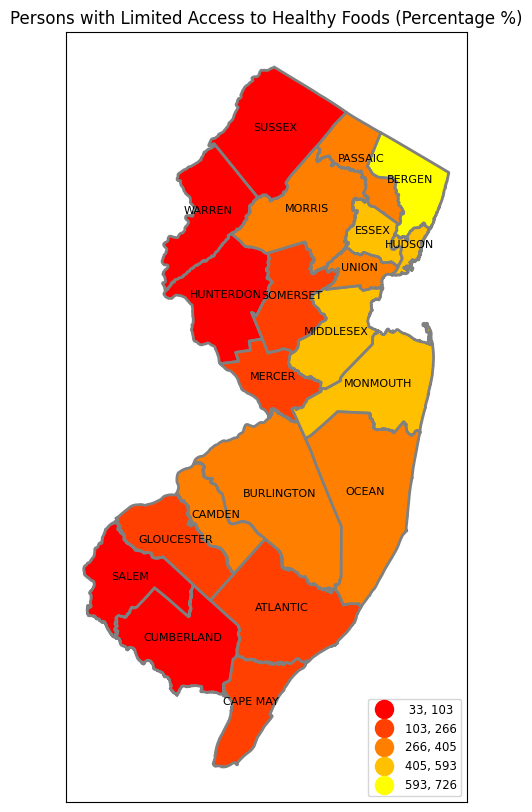

In [51]:
#first thematic map! lets unpack options esp fmt for dec pts; more later sec 'bells and whistles'
fig, ax = plt.subplots(1, figsize=(6,10))
njC2.plot(ax=ax,column='FAST FOOD RESTAURANTS 2011 COUNT',legend=True,cmap='autumn',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #

# Add county names on the map
njC2.apply(lambda x: ax.text(x.geometry.centroid.x, x.geometry.centroid.y,
                             x['COUNTY'], fontsize=8, ha='center'), axis=1)

#leg1 = ax.get_legend()
#leg1.set_title('''Population Density
#2010 (pers/sq mi)''')
ax.title.set_text("Persons with Limited Access to Healthy Foods (Percentage %)")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks

#plt.savefig('fig.pdf',bbox_inches='tight') #,pad_inches=0.1, dpi=200, transparent=True #eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
#files.download('fig.pdf') #note can also right click fig and save image as

Map with all datasets on njC3

<Axes: >

,0
0,"Text(-8311174.075015094, 4790366.237242303, 'A..."
2,"Text(-8246337.247068637, 5006655.089576726, 'B..."
4,"Text(-8312044.444576543, 4848269.124234073, 'B..."
6,"Text(-8344506.89112397, 4837478.296176319, 'CA..."
8,"Text(-8326688.160923031, 4743044.344964853, 'C..."
10,"Text(-8361279.012639857, 4775359.647757998, 'C..."
12,"Text(-8265113.615734561, 4980977.958160284, 'E..."
14,"Text(-8364677.696652, 4824935.330250312, 'GLOU..."
16,"Text(-8246574.496996955, 4973815.024634254, 'H..."
18,"Text(-8339191.301984139, 4948759.2571001155, '..."


[]

[]

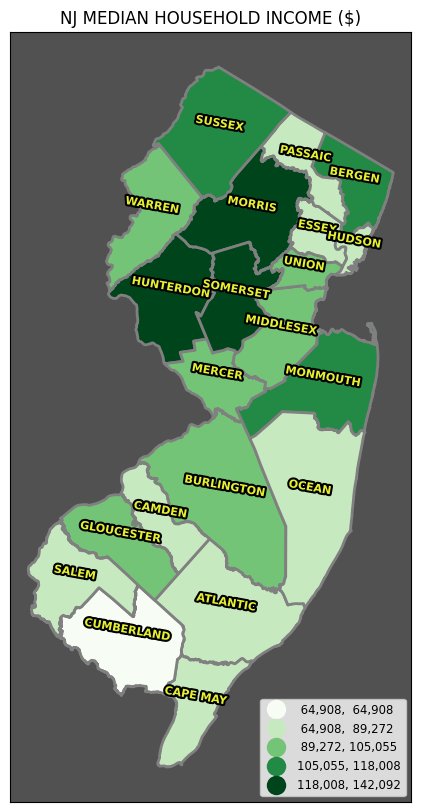

In [52]:
import matplotlib.patheffects as path_effects
# Media income map

fig, ax = plt.subplots(1, figsize=(6,10))
ax.set_facecolor('#525151')  # Set to light grey, replace with your desired color #D3D3D3

njC3.plot(ax=ax,column='MEDIAN HOUSEHOLD INCOME',legend=True,cmap='Greens',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #

# Add county names on the map
njC3.apply(lambda x: ax.text(x.geometry.centroid.x, x.geometry.centroid.y,
                             x['COUNTY'], fontsize=8, ha='center', color = '#e6f032', fontweight = 'bold', rotation=350,
                             path_effects=[path_effects.withStroke(linewidth=3, foreground="#000000")]), axis=1)

#leg1 = ax.get_legend()
#leg1.set_title('''Population Density
#2010 (pers/sq mi)''')
ax.title.set_text("NJ MEDIAN HOUSEHOLD INCOME ($)")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks

#plt.savefig('fig.pdf',bbox_inches='tight') #,pad_inches=0.1, dpi=200, transparent=True #eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
#files.download('fig.pdf') #note can also right click fig and save image as

Clean up version of MEDIAN HOUSEHOLD INCOME

We must create a copy of our weorking dataframe if we cut and make bins this way as it actually alters the dataframe and causes issues if you try and do it more than once.

In [53]:
# Create a copy of the original GeoDataFrame
njC3_copy = njC3.copy()

Run just once

In [54]:
#njC3_copy['MEDIAN HOUSEHOLD INCOME'] = pd.cut(njC3_copy['MEDIAN HOUSEHOLD INCOME'], bins=bins, labels=labels, include_lowest=True)


In [55]:
njC3_copy.dtypes

,0
COUNTY,object
COUNTY_LAB,object
CO,object
GNIS_NAME,object
GNIS,object
FIPSSTCO,object
FIPSCO,object
ACRES,float64
SQ_MILES,float64
POP2010,float64


In [56]:
njC3.dtypes

,0
COUNTY,object
COUNTY_LAB,object
CO,object
GNIS_NAME,object
GNIS,object
FIPSSTCO,object
FIPSCO,object
ACRES,float64
SQ_MILES,float64
POP2010,float64


MAP 1

<Axes: >

,0
0,"Text(-8311174.075015094, 4790366.237242303, 'A..."
2,"Text(-8246337.247068637, 5006655.089576726, 'B..."
4,"Text(-8312044.444576543, 4848269.124234073, 'B..."
6,"Text(-8344506.89112397, 4837478.296176319, 'CA..."
8,"Text(-8326688.160923031, 4743044.344964853, 'C..."
10,"Text(-8361279.012639857, 4775359.647757998, 'C..."
12,"Text(-8265113.615734561, 4980977.958160284, 'E..."
14,"Text(-8364677.696652, 4824935.330250312, 'GLOU..."
16,"Text(-8246574.496996955, 4973815.024634254, 'H..."
18,"Text(-8339191.301984139, 4948759.2571001155, '..."


Text(0.5, 1.0, 'NJ Population')

[]

[]

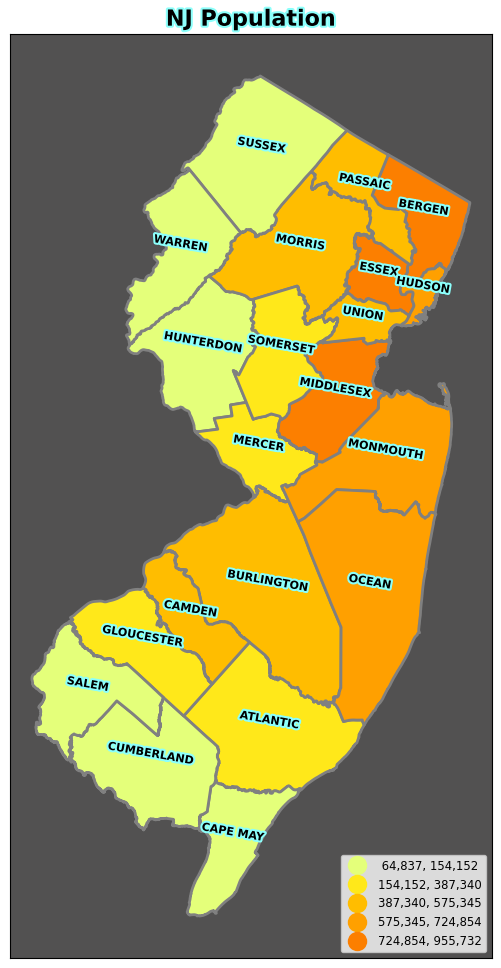

In [57]:
import matplotlib.patheffects as path_effects

fig, ax = plt.subplots(1, figsize=(8,12))
ax.set_facecolor('#525151')  #  #D3D3D3

njC3.plot(ax=ax,column='POPULATION',legend=True,cmap='Wistia',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #

# Add county names on the map
njC3.apply(lambda x: ax.text(x.geometry.centroid.x, x.geometry.centroid.y,
                             x['COUNTY'], fontsize=8, ha='center', color = '#000000', fontweight = 'bold', rotation=350,
                             path_effects=[path_effects.withStroke(linewidth=3, foreground="#8cfffb")]), axis=1)

# title and ticks
ax.set_title("NJ Population", fontsize=16, fontweight='bold', color='#000000', fontname='Arial', path_effects=[path_effects.withStroke(linewidth=3, foreground="#8cfffb")])

ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks

#plt.savefig('fig.pdf',bbox_inches='tight') #,pad_inches=0.1, dpi=200, transparent=True #eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
#files.download('fig.pdf') #note can also right click fig and save image as

##Test to make sure that the Centroids appear where they should

In [58]:
njCentroid = njC3.copy()

njCentroid["geometry"] = njCentroid["geometry"].centroid

In [59]:
njCentroid.head(3)

,COUNTY,COUNTY_LAB,CO,GNIS_NAME,GNIS,FIPSSTCO,FIPSCO,ACRES,SQ_MILES,POP2010,...,merge,POPULATION,EMPLOYMENT RATE PERCENTAGE,TOTAL EMPLOYER ESTABLISHMENTS,MEDIAN HOUSEHOLD INCOME,TOTAL HOUSING UNITS,TOTAL HOUSEHOLDS,BACHELOR'S DEGREE OR HIGHER PERCENTAGE,WITHOUT HEALTH CARE COVERAGE PERCENTAGE,merge_source
0,ATLANTIC,Atlantic County,ATL,County of Atlantic,882270,34001,1,390815.404215,610.649069,274549.0,...,both,274534.0,60.1,6145.0,77053.0,132038.0,111158.0,33.3,6.7,both
2,BERGEN,Bergen County,BER,County of Bergen,882271,34003,3,153490.275182,239.828555,905116.0,...,both,955732.0,64.8,31524.0,116709.0,367383.0,3564438.0,53.3,5.5,both
4,BURLINGTON,Burlington County,BUR,County of Burlington,882272,34005,5,525002.683590,820.316693,448734.0,...,both,461860.0,63.4,10438.0,102532.0,184775.0,179477.0,42.4,3.6,both


<Axes: >

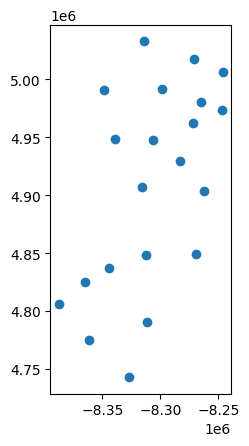

In [60]:
njCentroid.plot()

<Axes: >

[]

[]

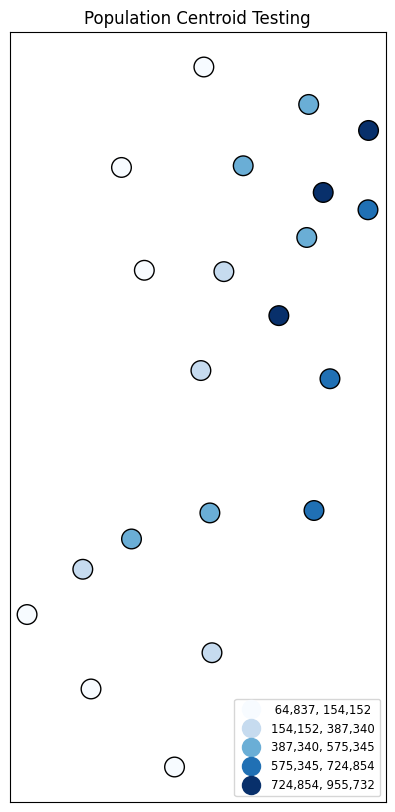

In [61]:
fig, ax = plt.subplots(1, figsize=(6,10))
njCentroid.plot(ax=ax,column='POPULATION',legend=True,cmap='Blues',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4},
         markersize = 200) #
ax.title.set_text("Population Centroid Testing")
ax.set_xticks([]); ax.set_yticks([])

Centroid Maps

Map 2

<Axes: >

<Axes: >

[]

[]

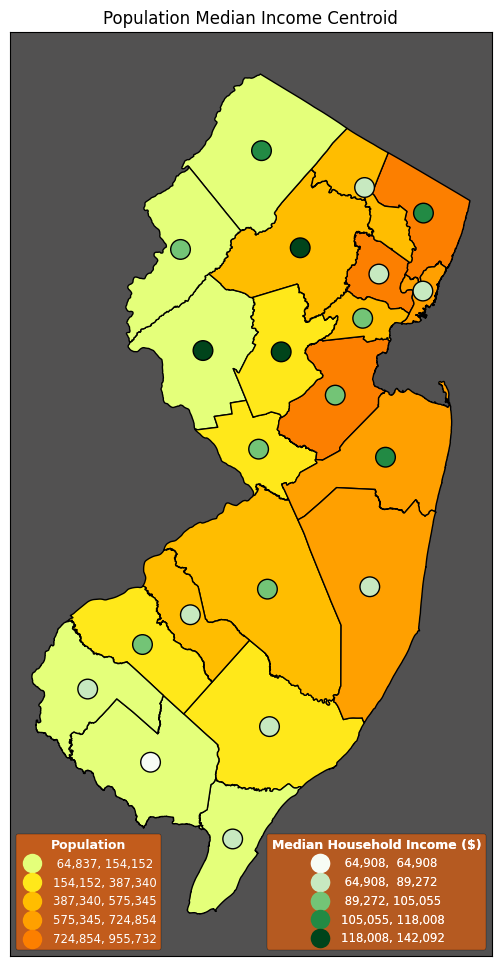

In [62]:
fig, ax = plt.subplots(1, figsize=(8,12))
ax.set_facecolor('#525151')  # Set to light grey, replace with your desired color #D3D3D3

njC3.plot(ax=ax,column='POPULATION',legend=True,cmap='Wistia',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower left','title_fontsize':'medium','fontsize':'small','markerscale':1.4})

l1 = ax.get_legend()
l1.set_title('''Population''')
l1.get_title().set_color('#ffffff')  # Change 'blue' to your desired color
l1.get_title().set_fontsize(9)    # Change 12 to your desired font size
l1.get_title().set_fontweight('bold')  # Set the title font weight to bold
l1.set_frame_on(True)  # Optional: Add a frame if desired
l1.get_frame().set_linewidth(0.3)  # Adjust frame width
l1.get_frame().set_edgecolor('black')  # Change frame color
l1.get_frame().set_facecolor('#ff6200')  # Set the background color (white in this case)
#l2.set_fontsize('small')  # Resize font size if necessary
l1.get_frame().set_alpha(0.65)  # Set opacity (0 to 1) for the legend box
#l1.get_texts()[0].set_color('#ffffff')  # Replace 'your_color' with the desired color

# Change color of all legend text entries
for text in l1.get_texts():
    text.set_color('#ffffff')  # Change 'red' to your desired color



njCentroid.plot(ax=ax,column='MEDIAN HOUSEHOLD INCOME',legend=True,cmap='Greens',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4},
         markersize = 200) #

ax.title.set_text("Population Median Income Centroid")
ax.set_xticks([]); ax.set_yticks([])


# Legend 2
l2 = ax.get_legend()
l2.set_title('''Median Household Income ($)''')
l2.get_title().set_color('#ffffff')  # Change 'blue' to your desired color
l2.get_title().set_fontsize(9)    # Change 12 to your desired font size
l2.get_title().set_fontweight('bold')  # Set the title font weight to bold

# Move the legend and resize it
l2.set_bbox_to_anchor((1, 0.0005))  # Adjust the (x, y) position
l2.set_frame_on(True)  # Optional: Add a frame if desired
l2.get_frame().set_linewidth(0.3)  # Adjust frame width
l2.get_frame().set_edgecolor('black')  # Change frame color
l2.get_frame().set_facecolor('#ff6200')  # Set the background color (white in this case)
#l2.set_fontsize(9)  # Resize font size if necessary
l2.get_frame().set_alpha(0.35)  # Set opacity (0 to 1) for the legend box
#l2.get_texts().set_color('#ffffff')  # Replace 'your_color' with the desired color
# Change color of all legend text entries
for text in l2.get_texts():
    text.set_color('#ffffff')  # Change 'red' to your desired color


ax.add_artist(l2)
ax.add_artist(l1)

Map 3

<Axes: >

<Axes: >

[]

[]

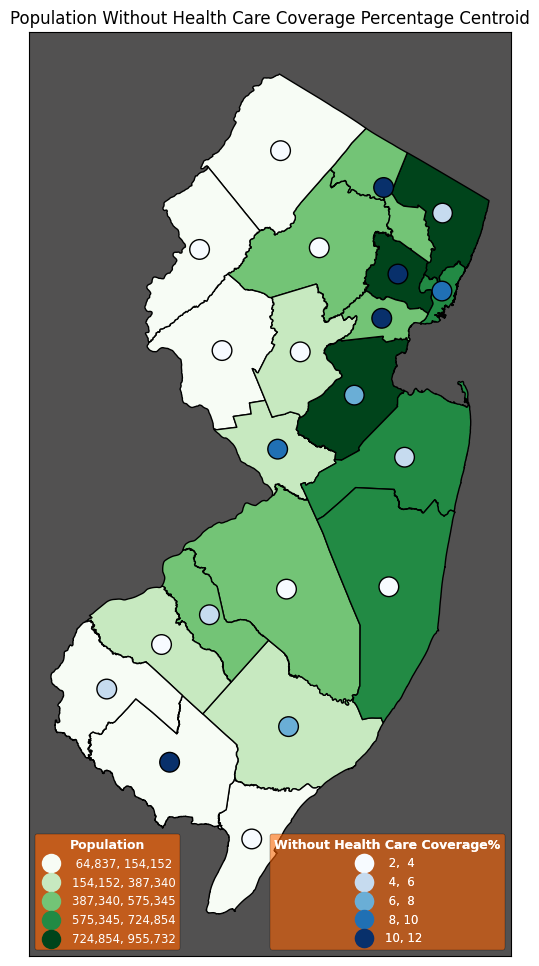

In [63]:
fig, ax = plt.subplots(1, figsize=(8,12))
ax.set_facecolor('#525151')  # Set to light grey, replace with your desired color #D3D3D3

njC3.plot(ax=ax,column='POPULATION',legend=True,cmap='Greens',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower left','title_fontsize':'medium','fontsize':'small','markerscale':1.4})

# Legend 1
l1 = ax.get_legend()
l1.set_title('''Population''')
l1.get_title().set_color('#ffffff')  # Change 'blue' to your desired color
l1.get_title().set_fontsize(9)    # Change 12 to your desired font size
l1.get_title().set_fontweight('bold')  # Set the title font weight to bold

l1.set_frame_on(True)  # Optional: Add a frame if desired
l1.get_frame().set_linewidth(0.3)  # Adjust frame width
l1.get_frame().set_edgecolor('black')  # Change frame color
l1.get_frame().set_facecolor('#ff6200')  # Set the background color (white in this case)
#l2.set_fontsize('small')  # Resize font size if necessary
l1.get_frame().set_alpha(0.65)  # Set opacity (0 to 1) for the legend box
#l1.get_texts()[0].set_color('#ffffff')  # Replace 'your_color' with the desired color.      #THIS IS THE ONE to change the specific index of your legend for different color

# Change color of all legend text entries
for text in l1.get_texts():
    text.set_color('#ffffff')  # Change 'red' to your desired color


njCentroid.plot(ax=ax,column='WITHOUT HEALTH CARE COVERAGE PERCENTAGE',legend=True,cmap='Blues',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4},
         markersize = 200)

ax.title.set_text("Population Without Health Care Coverage Percentage Centroid")
ax.set_xticks([]); ax.set_yticks([])


# Legend 2
l2 = ax.get_legend()
l2.set_title('''Without Health Care Coverage%''')
l2.get_title().set_color('#ffffff')  # Change 'blue' to your desired color
l2.get_title().set_fontsize(9)    # Change 12 to your desired font size
l2.get_title().set_fontweight('bold')  # Set the title font weight to bold

# Move the legend and resize it
l2.set_bbox_to_anchor((1, 0.0005))  # Adjust the (x, y) position
l2.set_frame_on(True)  # Optional: Add a frame if desired
l2.get_frame().set_linewidth(0.3)  # Adjust frame width
l2.get_frame().set_edgecolor('black')  # Change frame color
l2.get_frame().set_facecolor('#ff6200')  # Set the background color (white in this case)
#l2.set_fontsize(9)  # Resize font size if necessary
l2.get_frame().set_alpha(0.35)  # Set opacity (0 to 1) for the legend box
#l2.get_texts().set_color('#ffffff')  # Replace 'your_color' with the desired color
# Change color of all legend text entries
for text in l2.get_texts():
    text.set_color('#ffffff')  # Change 'red' to your desired color




ax.add_artist(l2)
ax.add_artist(l1)

## SIDE BY SIDE ANALYSIS

Map 4-5

<Axes: >

Text(0.5, 1.0, 'FAST FOOD RESTAURANTS 2016 COUNT')

'\nnjC3.plot(ax=ax,column=\'FAST FOOD RESTAURANTS 2011 COUNT\',legend=True,cmap=\'Reds\',scheme=\'natural_breaks\',k=5,\n         edgecolor=\'black\',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",\n        \'loc\':\'lower left\',\'title_fontsize\':\'medium\',\'fontsize\':\'small\',\'markerscale\':1.4})\naxes[0].set_title(\'FAST FOOD RESTAURANTS 2011 COUNT NJ\')\n'

<Axes: >

Text(0.5, 1.0, 'EMPLOYMENT RATE %')

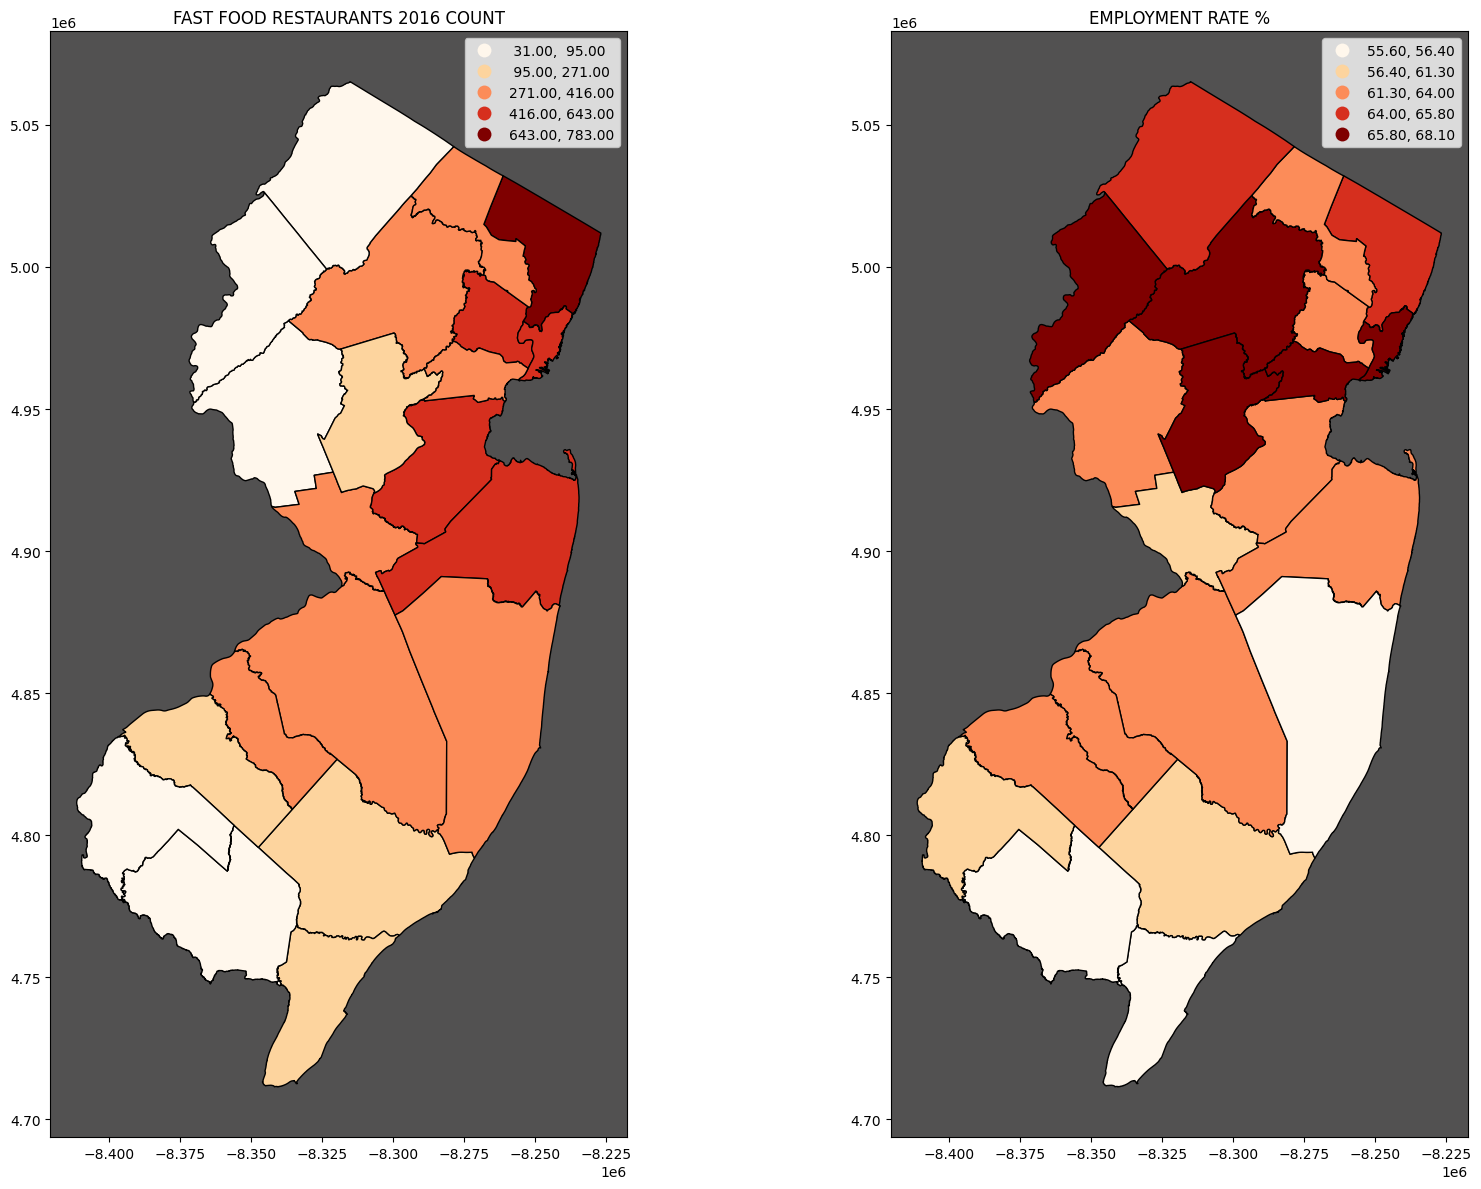

In [64]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(18, 12))
# Set the background color for each subplot
axes[0].set_facecolor('#525151')  # Light gray for the first subplot
axes[1].set_facecolor('#525151')  # Slightly darker gray for the second subplot



# Plot the first map

njC3.plot(column='FAST FOOD RESTAURANTS 2016 COUNT',  # Replace 'column1' with the column name you want to plot
         cmap='OrRd', legend=True, scheme='natural_breaks', k=5, edgecolor='black',linewidth=1,
         ax=axes[0])
axes[0].set_title('FAST FOOD RESTAURANTS 2016 COUNT')


'''
njC3.plot(ax=ax,column='FAST FOOD RESTAURANTS 2011 COUNT',legend=True,cmap='Reds',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower left','title_fontsize':'medium','fontsize':'small','markerscale':1.4})
axes[0].set_title('FAST FOOD RESTAURANTS 2011 COUNT NJ')
'''

# Plot the second map
njC3.plot(column='EMPLOYMENT RATE PERCENTAGE',  # Replace 'column2' with the other column name you want to plot
         cmap='OrRd',  # Color map for the second plot
         legend=True, scheme='natural_breaks', k=5, edgecolor='black',linewidth=1,
         ax=axes[1])
axes[1].set_title('EMPLOYMENT RATE %')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [65]:
njC3.dtypes

,0
COUNTY,object
COUNTY_LAB,object
CO,object
GNIS_NAME,object
GNIS,object
FIPSSTCO,object
FIPSCO,object
ACRES,float64
SQ_MILES,float64
POP2010,float64


Map 6-7

<Axes: >

Text(0.5, 1.0, 'FAST FOOD RESTAURANTS 2011 COUNT')

'\nnjC3.plot(ax=ax,column=\'FAST FOOD RESTAURANTS 2011 COUNT\',legend=True,cmap=\'Reds\',scheme=\'natural_breaks\',k=5,\n         edgecolor=\'black\',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",\n        \'loc\':\'lower left\',\'title_fontsize\':\'medium\',\'fontsize\':\'small\',\'markerscale\':1.4})\naxes[0].set_title(\'FAST FOOD RESTAURANTS 2011 COUNT NJ\')\n'

<Axes: >

Text(0.5, 1.0, 'POPDEN2010')

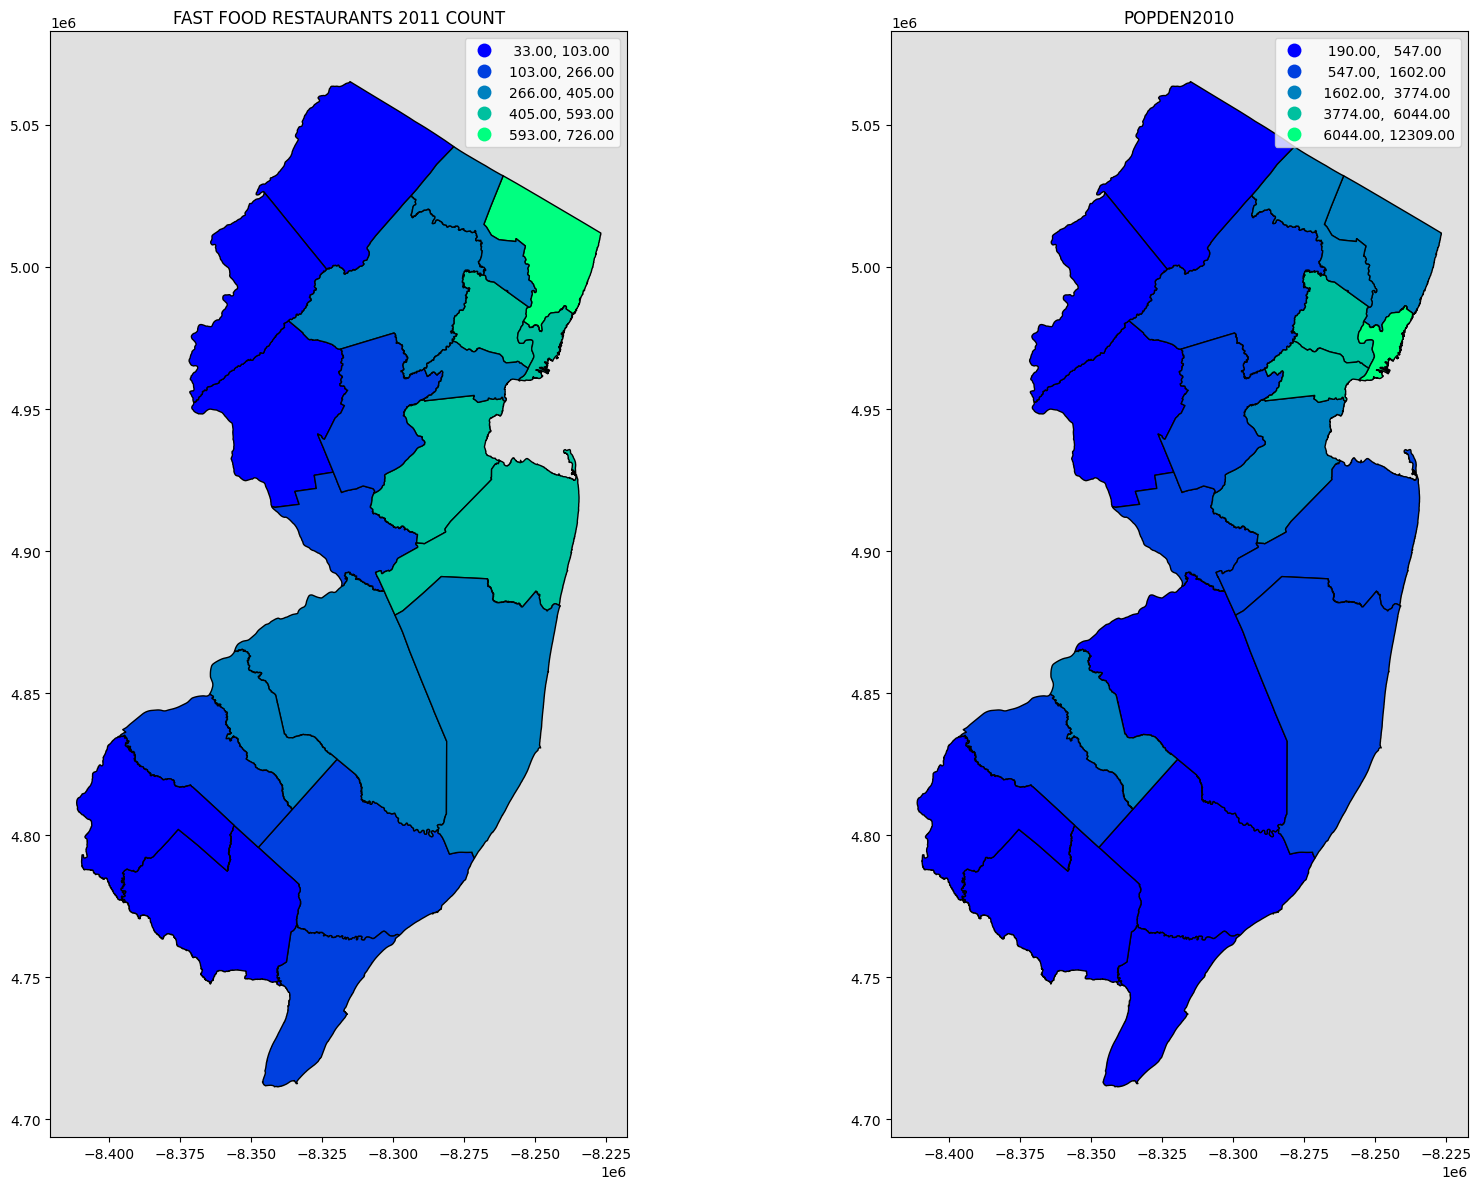

In [66]:
# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(18, 12))
# Set the background color for each subplot
axes[0].set_facecolor('#e0e0e0')  # Light gray for the first subplot #e0e0e0, # 525151
axes[1].set_facecolor('#e0e0e0')  # Slightly darker gray for the second subplot



# Plot the first map

njC3.plot(column='FAST FOOD RESTAURANTS 2011 COUNT',  # Replace 'column1' with the column name you want to plot
         cmap='winter', legend=True, scheme='natural_breaks', k=5, edgecolor='black',linewidth=1,
         ax=axes[0])
axes[0].set_title('FAST FOOD RESTAURANTS 2011 COUNT')


'''
njC3.plot(ax=ax,column='FAST FOOD RESTAURANTS 2011 COUNT',legend=True,cmap='Reds',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower left','title_fontsize':'medium','fontsize':'small','markerscale':1.4})
axes[0].set_title('FAST FOOD RESTAURANTS 2011 COUNT NJ')
'''

# Plot the second map
njC3.plot(column='POPDEN2010',  # Replace 'column2' with the other column name you want to plot
         cmap='winter',  # Color map for the second plot
         legend=True, scheme='natural_breaks', k=5, edgecolor='black',linewidth=1,
         ax=axes[1])
axes[1].set_title('POPDEN2010')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

## More Maps

In [67]:
mcdonaldsCamden = pd.read_csv('https://github.com/eadamsRU/GIS_RU/raw/refs/heads/main/McDonalds%20NJ%20Camden%20County%20-%20Sheet1.csv')

In [68]:
mcdonaldsCamden.dtypes

,0
COUNTY,object
CONAME,object
STREET,object
CITY,object
STATE,object
ZIP,int64
LAT,float64
LONG,float64


In [69]:
mcdonaldsHudson = pd.read_csv('https://github.com/eadamsRU/GIS_RU/raw/refs/heads/main/McDonalds%20NJ%20Hudson%20County%20-%20Sheet1.csv')

<Axes: >

<Axes: >

<Axes: >

Text(0.5, 1.0, "McDonald's in NJ Counties Commuting to Cities")

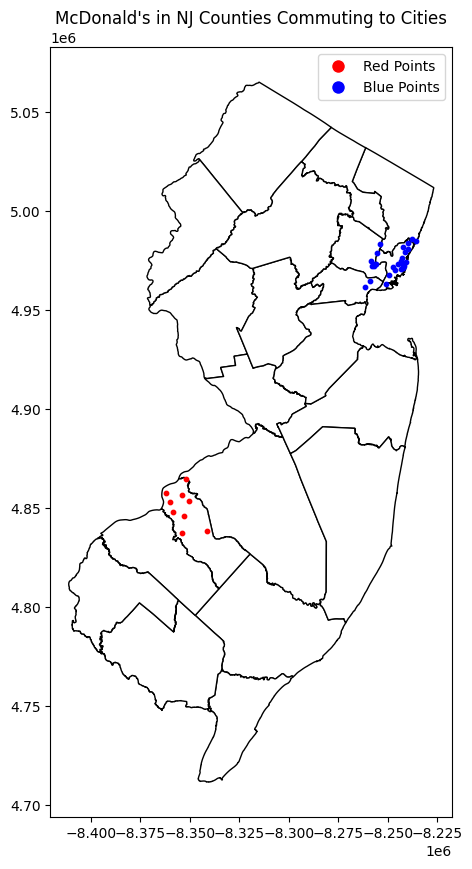

In [70]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
from matplotlib.lines import Line2D

# Load the base shapefile for `njC` and set to the correct CRS if needed
# Assuming `njC` is already loaded
njC0 = njC0.to_crs(epsg=3857)  # Convert to Web Mercator for consistency

# Assume `df_red` and `df_blue` are your two DataFrames with LAT and LONG columns

# Convert `df_red` to a GeoDataFrame for red points
geometry_red = [Point(xy) for xy in zip(mcdonaldsCamden['LONG'], mcdonaldsCamden['LAT'])]
gdf_red = gpd.GeoDataFrame(mcdonaldsCamden, geometry=geometry_red, crs="EPSG:4326")
gdf_red = gdf_red.to_crs(epsg=3857)  # Reproject to EPSG:3857

# Convert `df_blue` to a GeoDataFrame for blue points
geometry_blue = [Point(xy) for xy in zip(mcdonaldsHudson['LONG'], mcdonaldsHudson['LAT'])]
gdf_blue = gpd.GeoDataFrame(mcdonaldsHudson, geometry=geometry_blue, crs="EPSG:4326")
gdf_blue = gdf_blue.to_crs(epsg=3857)  # Reproject to EPSG:3857

# Plot the map with all layers
fig, ax = plt.subplots(1, figsize=(10, 10))

# Plot the shapefile as the base layer
njC0.plot(ax=ax, color='white', edgecolor='black', linewidth=1)

# Overlay the red and blue point layers
gdf_red.plot(ax=ax, marker='o', color='red', markersize=10, label="McDonald's in Camden County")
gdf_blue.plot(ax=ax, marker='o', color='blue', markersize=10, label="McDonald's in Hudson County")

# Add a custom legend
red_point = Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Red Points')
blue_point = Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Blue Points')
plt.legend(handles=[red_point, blue_point])

# Set the title and display the plot
ax.set_title("McDonald's in NJ Counties Commuting to Cities")
plt.show()

<Axes: >

<Axes: >

<Axes: >

<Axes: >

Text(0.5, 1.0, 'Population Median Income Centroid')

[]

[]

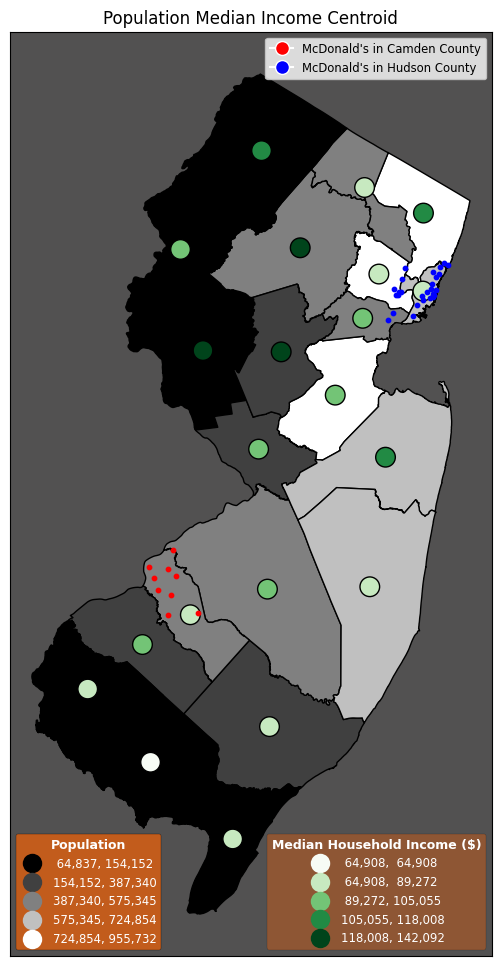

In [71]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from shapely.geometry import Point

# Your current map setup
fig, ax = plt.subplots(1, figsize=(8, 12))
ax.set_facecolor('#525151')  # Background color

# Base shapefile plot
njC3.plot(ax=ax, column='POPULATION', legend=True, cmap='gray', scheme='natural_breaks', k=5,
          edgecolor='black', linewidth=1,
          legend_kwds={"fmt": "{:,.0f}", 'loc': 'lower left', 'title_fontsize': 'medium',
                       'fontsize': 'small', 'markerscale': 1.4})

# Customize Legend 1
l1 = ax.get_legend()
l1.set_title('Population')
l1.get_title().set_color('#ffffff')
l1.get_title().set_fontsize(9)
l1.get_title().set_fontweight('bold')
l1.set_frame_on(True)
l1.get_frame().set_linewidth(0.3)
l1.get_frame().set_edgecolor('black')
l1.get_frame().set_facecolor('#ff6200')
l1.get_frame().set_alpha(0.65)
for text in l1.get_texts():
    text.set_color('#ffffff')

# Additional layer for median household income
njCentroid.plot(ax=ax, column='MEDIAN HOUSEHOLD INCOME', legend=True, cmap='Greens', scheme='natural_breaks', k=5,
                edgecolor='black', linewidth=1,
                legend_kwds={"fmt": "{:,.0f}", 'loc': 'lower right', 'title_fontsize': 'medium',
                             'fontsize': 'small', 'markerscale': 1.4},
                markersize=200)

# Customize Legend 2
l2 = ax.get_legend()
l2.set_title('Median Household Income ($)')
l2.get_title().set_color('#ffffff')
l2.get_title().set_fontsize(9)
l2.get_title().set_fontweight('bold')
l2.set_bbox_to_anchor((1, 0.0005))  # Adjust position
l2.set_frame_on(True)
l2.get_frame().set_linewidth(0.3)
l2.get_frame().set_edgecolor('black')
l2.get_frame().set_facecolor('#ff6200')
l2.get_frame().set_alpha(0.35)
for text in l2.get_texts():
    text.set_color('#ffffff')

# Overlay the red and blue points
gdf_red.plot(ax=ax, marker='o', color='red', markersize=10, label="Red Points")
gdf_blue.plot(ax=ax, marker='o', color='blue', markersize=10, label="Blue Points")

# Add a custom legend for red and blue points
red_point = Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label="McDonald's in Camden County")
blue_point = Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label="McDonald's in Hudson County")
plt.legend(handles=[red_point, blue_point], loc='upper right', fontsize='small')

# Set the title and remove x/y ticks
ax.set_title("Population Median Income Centroid")
ax.set_xticks([])
ax.set_yticks([])

# Add legends to the axis
ax.add_artist(l1)
ax.add_artist(l2)

plt.show()


popden

In [72]:
njC3.dtypes

,0
COUNTY,object
COUNTY_LAB,object
CO,object
GNIS_NAME,object
GNIS,object
FIPSSTCO,object
FIPSCO,object
ACRES,float64
SQ_MILES,float64
POP2010,float64


##PS3

<Axes: >

<Axes: >

<Axes: >

<Axes: >

Text(0.5, 1.0, "Income, Healthcare Disparities, and McDonald's Presence by County")

[]

[]

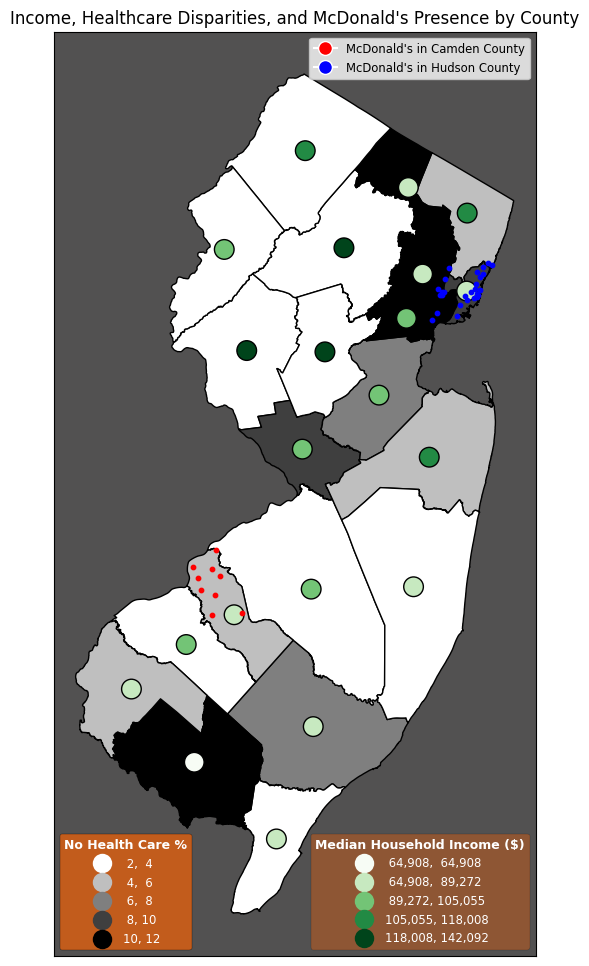

In [87]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from shapely.geometry import Point

# Your current map setup
fig, ax = plt.subplots(1, figsize=(8, 12))
ax.set_facecolor('#525151')  # Background color

# Base shapefile plot
njC3.plot(ax=ax, column="WITHOUT HEALTH CARE COVERAGE PERCENTAGE", legend=True, cmap='gray_r', scheme='natural_breaks', k=5,
          edgecolor='black', linewidth=1,
          legend_kwds={"fmt": "{:,.0f}", 'loc': 'lower left', 'title_fontsize': 'medium',
                       'fontsize': 'small', 'markerscale': 1.4})

# Customize Legend 1
l1 = ax.get_legend()
l1.set_title("No Health Care %")
l1.get_title().set_color('#ffffff')
l1.get_title().set_fontsize(9)
l1.get_title().set_fontweight('bold')
l1.set_frame_on(True)
l1.get_frame().set_linewidth(0.3)
l1.get_frame().set_edgecolor('black')
l1.get_frame().set_facecolor('#ff6200')
l1.get_frame().set_alpha(0.65)
for text in l1.get_texts():
    text.set_color('#ffffff')

# Additional layer for median household income
njCentroid.plot(ax=ax, column='MEDIAN HOUSEHOLD INCOME', legend=True, cmap='Greens', scheme='natural_breaks', k=5,
                edgecolor='black', linewidth=1,
                legend_kwds={"fmt": "{:,.0f}", 'loc': 'lower right', 'title_fontsize': 'medium',
                             'fontsize': 'small', 'markerscale': 1.4},
                markersize=200)

# Customize Legend 2
l2 = ax.get_legend()
l2.set_title('Median Household Income ($)')
l2.get_title().set_color('#ffffff')
l2.get_title().set_fontsize(9)
l2.get_title().set_fontweight('bold')
l2.set_bbox_to_anchor((1, 0.0005))  # Adjust position
l2.set_frame_on(True)
l2.get_frame().set_linewidth(0.3)
l2.get_frame().set_edgecolor('black')
l2.get_frame().set_facecolor('#ff6200')
l2.get_frame().set_alpha(0.35)
for text in l2.get_texts():
    text.set_color('#ffffff')

# Overlay the red and blue points
gdf_red.plot(ax=ax, marker='o', color='red', markersize=10, label="Red Points")
gdf_blue.plot(ax=ax, marker='o', color='blue', markersize=10, label="Blue Points")

# Add a custom legend for red and blue points
red_point = Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label="McDonald's in Camden County")
blue_point = Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label="McDonald's in Hudson County")
plt.legend(handles=[red_point, blue_point], loc='upper right', fontsize='small')

# Set the title and remove x/y ticks
ax.set_title("Income, Healthcare Disparities, and McDonald's Presence by County")
ax.set_xticks([])
ax.set_yticks([])

# Add legends to the axis
ax.add_artist(l1)
ax.add_artist(l2)

plt.show()

#PS3 Maps

histogram 1

Text(0.5, 1.0, 'Median Household Income by County with Thicker Outlined Bars')

Text(0.5, 0, 'COUNTY')

Text(0, 0.5, 'Median Household Income ($)')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 [Text(0, 0, 'SOMERSET'),
  Text(1, 0, 'HUNTERDON'),
  Text(2, 0, 'MORRIS'),
  Text(3, 0, 'MONMOUTH'),
  Text(4, 0, 'BERGEN'),
  Text(5, 0, 'SUSSEX'),
  Text(6, 0, 'MIDDLESEX'),
  Text(7, 0, 'BURLINGTON'),
  Text(8, 0, 'UNION'),
  Text(9, 0, 'WARREN'),
  Text(10, 0, 'GLOUCESTER'),
  Text(11, 0, 'MERCER'),
  Text(12, 0, 'HUDSON'),
  Text(13, 0, 'SALEM'),
  Text(14, 0, 'OCEAN'),
  Text(15, 0, 'CAPE MAY'),
  Text(16, 0, 'CAMDEN'),
  Text(17, 0, 'PASSAIC'),
  Text(18, 0, 'ESSEX'),
  Text(19, 0, 'ATLANTIC'),
  Text(20, 0, 'CUMBERLAND')])

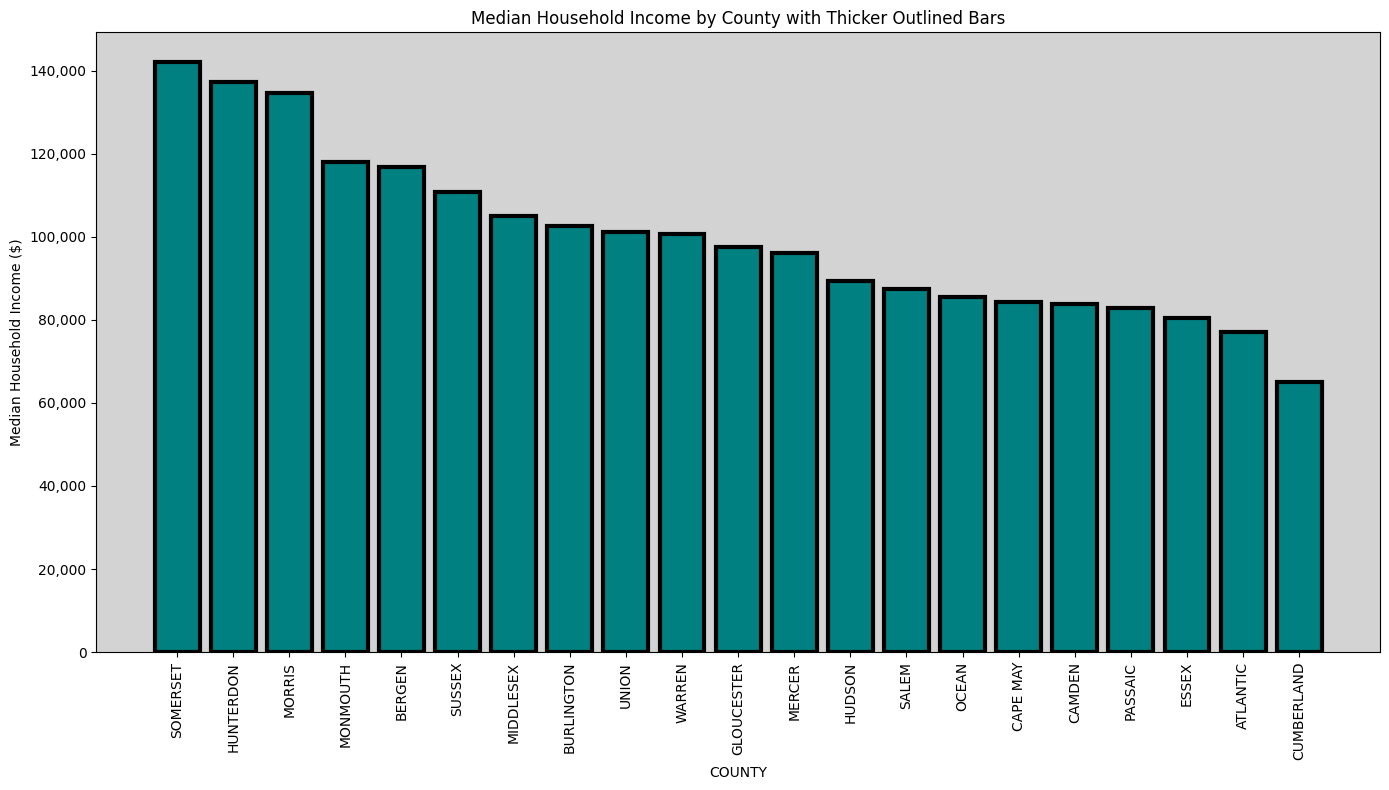

In [105]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Sort the DataFrame by 'MEDIAN HOUSEHOLD INCOME' for better visualization
NjC3_sorted = njC3.sort_values(by='MEDIAN HOUSEHOLD INCOME', ascending=False)

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(14, 8))

# Set the background color of the plot (light gray)
ax.set_facecolor('lightgray')

# Create a bar chart with outlined bars and thicker outlines
bars = ax.bar(NjC3_sorted['COUNTY'], NjC3_sorted['MEDIAN HOUSEHOLD INCOME'], color='teal', edgecolor='black', linewidth=3)

# Add title and labels
ax.set_title('Median Household Income by County with Thicker Outlined Bars')
ax.set_xlabel('COUNTY')
ax.set_ylabel('Median Household Income ($)')

# Format y-axis to include commas
formatter = FuncFormatter(lambda x, _: f'{x:,.0f}')  # Format y-axis with commas
ax.yaxis.set_major_formatter(formatter)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Adjust layout for better fit
plt.tight_layout()

# Show the plot
plt.show()


PS3 Map #1

<Axes: >

<Axes: >

<Axes: >

<Axes: >

Text(0.5, 1.0, "Income, Healthcare Disparities, and McDonald's Presence by County")

[]

[]

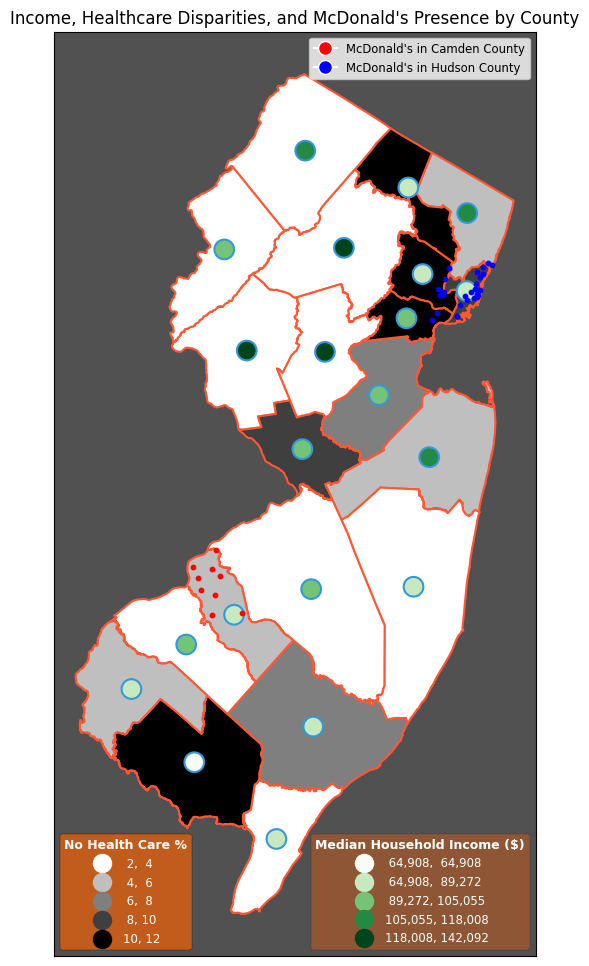

In [88]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from shapely.geometry import Point

# Your current map setup
fig, ax = plt.subplots(1, figsize=(8, 12))
ax.set_facecolor('#525151')  # Background color

# Base shapefile plot with updated county line color
njC3.plot(
    ax=ax,
    column="WITHOUT HEALTH CARE COVERAGE PERCENTAGE",
    legend=True,
    cmap='gray_r',
    scheme='natural_breaks',
    k=5,
    edgecolor='#FF5733',  # Custom color for county lines (orange)
    linewidth=1.5,        # Adjusted line width for visibility
    legend_kwds={
        "fmt": "{:,.0f}",
        'loc': 'lower left',
        'title_fontsize': 'medium',
        'fontsize': 'small',
        'markerscale': 1.4
    }
)

# Customize Legend 1
l1 = ax.get_legend()
l1.set_title("No Health Care %")
l1.get_title().set_color('#ffffff')
l1.get_title().set_fontsize(9)
l1.get_title().set_fontweight('bold')
l1.set_frame_on(True)
l1.get_frame().set_linewidth(0.3)
l1.get_frame().set_edgecolor('black')
l1.get_frame().set_facecolor('#ff6200')
l1.get_frame().set_alpha(0.65)
for text in l1.get_texts():
    text.set_color('#ffffff')

# Additional layer for median household income with updated line color
njCentroid.plot(
    ax=ax,
    column='MEDIAN HOUSEHOLD INCOME',
    legend=True,
    cmap='Greens',
    scheme='natural_breaks',
    k=5,
    edgecolor='#3498DB',  # Custom color for county lines (blue)
    linewidth=1.5,        # Adjusted line width for visibility
    legend_kwds={
        "fmt": "{:,.0f}",
        'loc': 'lower right',
        'title_fontsize': 'medium',
        'fontsize': 'small',
        'markerscale': 1.4
    },
    markersize=200
)

# Customize Legend 2
l2 = ax.get_legend()
l2.set_title('Median Household Income ($)')
l2.get_title().set_color('#ffffff')
l2.get_title().set_fontsize(9)
l2.get_title().set_fontweight('bold')
l2.set_bbox_to_anchor((1, 0.0005))  # Adjust position
l2.set_frame_on(True)
l2.get_frame().set_linewidth(0.3)
l2.get_frame().set_edgecolor('black')
l2.get_frame().set_facecolor('#ff6200')
l2.get_frame().set_alpha(0.35)
for text in l2.get_texts():
    text.set_color('#ffffff')

# Overlay the red and blue points
gdf_red.plot(ax=ax, marker='o', color='red', markersize=10, label="Red Points")
gdf_blue.plot(ax=ax, marker='o', color='blue', markersize=10, label="Blue Points")

# Add a custom legend for red and blue points
red_point = Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label="McDonald's in Camden County")
blue_point = Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label="McDonald's in Hudson County")
plt.legend(handles=[red_point, blue_point], loc='upper right', fontsize='small')

# Set the title and remove x/y ticks
ax.set_title("Income, Healthcare Disparities, and McDonald's Presence by County")
ax.set_xticks([])
ax.set_yticks([])

# Add legends to the axis
ax.add_artist(l1)
ax.add_artist(l2)

plt.show()


In [ ]:
njC3.dtypes

PS3 Map #2

POPULATION DENSITY THIS TIME.

<Axes: >

<Axes: >

<Axes: >

<Axes: >

Text(0.5, 1.0, "Income, Healthcare Disparities, and McDonald's Presence by County")

[]

[]

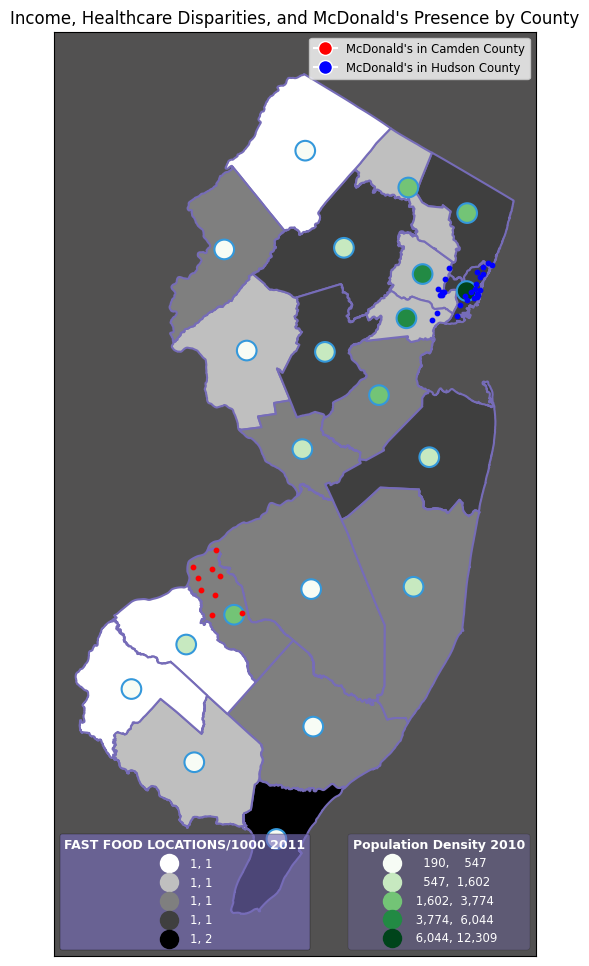

In [116]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from shapely.geometry import Point

# Your current map setup
fig, ax = plt.subplots(1, figsize=(8, 12))
ax.set_facecolor('#525151')  # Background color

# Base shapefile plot with updated county line color
njC3.plot(
    ax=ax,
    column="FAST FOOD RESTAURANTS PER 1000 POP COUNT 2011",
    legend=True,
    cmap='gray_r',
    scheme='natural_breaks',
    k=5,
    edgecolor='#766cb8',  # Custom color for county lines (orange)
    linewidth=1.5,        # Adjusted line width for visibility
    legend_kwds={
        "fmt": "{:,.0f}",
        'loc': 'lower left',
        'title_fontsize': 'medium',
        'fontsize': 'small',
        'markerscale': 1.4
    }
)

# Customize Legend 1
l1 = ax.get_legend()
l1.set_title("FAST FOOD LOCATIONS/1000 2011")
l1.get_title().set_color('#ffffff')
l1.get_title().set_fontsize(9)
l1.get_title().set_fontweight('bold')
l1.set_frame_on(True)
l1.get_frame().set_linewidth(0.3)
l1.get_frame().set_edgecolor('black')
l1.get_frame().set_facecolor('#766cb8')
l1.get_frame().set_alpha(0.65)
for text in l1.get_texts():
    text.set_color('#ffffff')

# Additional layer for median household income with updated line color
njCentroid.plot(
    ax=ax,
    column='POPDEN2010',
    legend=True,
    cmap='Greens',
    scheme='natural_breaks',
    k=5,
    edgecolor='#3498DB',  # Custom color for county lines (blue)
    linewidth=1.5,        # Adjusted line width for visibility
    legend_kwds={
        "fmt": "{:,.0f}",
        'loc': 'lower right',
        'title_fontsize': 'medium',
        'fontsize': 'small',
        'markerscale': 1.4
    },
    markersize=200
)

# Customize Legend 2
l2 = ax.get_legend()
l2.set_title('Population Density 2010')
l2.get_title().set_color('#ffffff')
l2.get_title().set_fontsize(9)
l2.get_title().set_fontweight('bold')
l2.set_bbox_to_anchor((1, 0.0005))  # Adjust position
l2.set_frame_on(True)
l2.get_frame().set_linewidth(0.3)
l2.get_frame().set_edgecolor('black')
l2.get_frame().set_facecolor('#766cb8')
l2.get_frame().set_alpha(0.35)
for text in l2.get_texts():
    text.set_color('#ffffff')

# Overlay the red and blue points
gdf_red.plot(ax=ax, marker='o', color='red', markersize=10, label="Red Points")
gdf_blue.plot(ax=ax, marker='o', color='blue', markersize=10, label="Blue Points")

# Add a custom legend for red and blue points
red_point = Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label="McDonald's in Camden County")
blue_point = Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label="McDonald's in Hudson County")
plt.legend(handles=[red_point, blue_point], loc='upper right', fontsize='small')

# Set the title and remove x/y ticks
ax.set_title("Income, Healthcare Disparities, and McDonald's Presence by County")
ax.set_xticks([])
ax.set_yticks([])

# Add legends to the axis
ax.add_artist(l1)
ax.add_artist(l2)

plt.show()


Pie Chart for Map 2

Text(0.5, 1.0, 'Population Density 2010 by County')

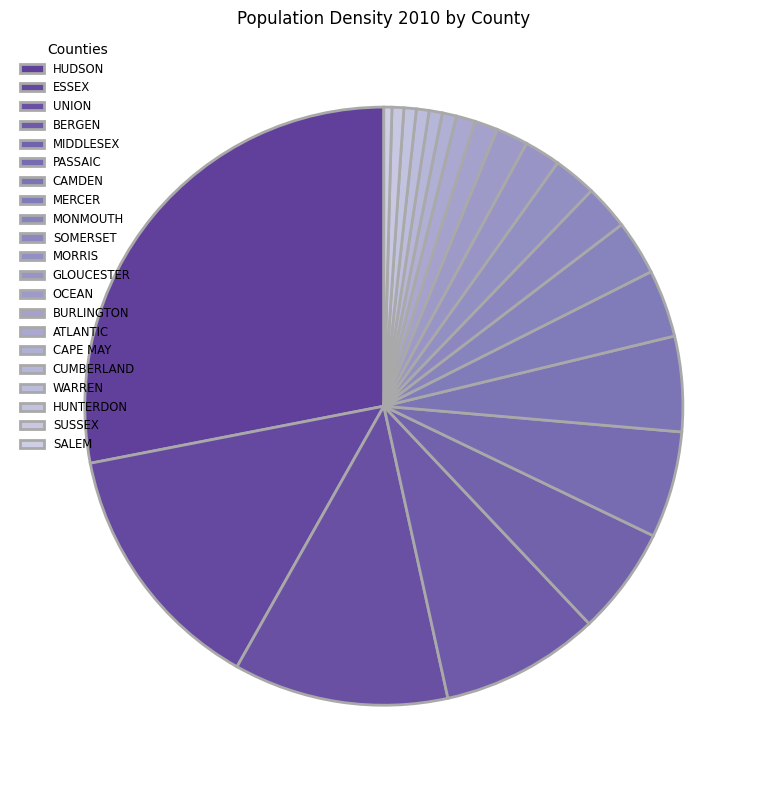

In [135]:
import matplotlib.pyplot as plt
import numpy as np

# Sort the DataFrame by 'POPDEN2010' for better visualization
NjC3_sorted = njC3.sort_values(by='POPDEN2010', ascending=False)

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 8))

# Set the background color of the plot (light gray)
ax.set_facecolor('lightgray')

# Generate reversed shades of purple using a colormap
colors = plt.cm.Purples(np.linspace(0.8, 0.3, len(NjC3_sorted)))  # Reverse the range for darker colors at the start

# Create the pie chart with dark gray edges
wedges, texts = ax.pie(NjC3_sorted['POPDEN2010'], labels=None, startangle=90, colors=colors,
                       wedgeprops={'edgecolor': 'darkgray', 'linewidth': 2})

# Add a title
ax.set_title('Population Density 2010 by County')

# Add the legend with the county names
ax.legend(wedges, NjC3_sorted['COUNTY'], title="Counties", loc="upper left", fontsize='small', frameon=False)

# Display the pie chart
plt.tight_layout()
plt.show()


In [ ]:
'''
import matplotlib.pyplot as plt

# Sort the DataFrame by 'POPDEN2010' for better visualization
NjC3_sorted = njC3.sort_values(by='POPDEN2010', ascending=False)

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 8))

# Set the background color of the plot (light gray)
ax.set_facecolor('lightgray')

# Create the pie chart
ax.pie(NjC3_sorted['POPDEN2010'], labels=NjC3_sorted['COUNTY'], autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

# Add a title
ax.set_title('Population Density 2010 by County')

# Display the pie chart
plt.tight_layout()
plt.show()
'''


Histogram 2

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Sort the DataFrame by 'MEDIAN HOUSEHOLD INCOME' for better visualization
NjC3_sorted = njC3.sort_values(by='POPDEN2010', ascending=False)

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(14, 8))

# Set the background color of the plot (light gray)
ax.set_facecolor('lightgray')

# Create a bar chart with outlined bars and thicker outlines
bars = ax.bar(NjC3_sorted['COUNTY'], NjC3_sorted['POPDEN2010'], color='purple', edgecolor='black', linewidth=3)

# Add title and labels
ax.set_title('Population Density 2010 by County with Thicker Outlined Bars')
ax.set_xlabel('COUNTY')
ax.set_ylabel('Median Household Income ($)')

# Format y-axis to include commas
formatter = FuncFormatter(lambda x, _: f'{x:,.0f}')  # Format y-axis with commas
ax.yaxis.set_major_formatter(formatter)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Adjust layout for better fit
plt.tight_layout()

# Show the plot
plt.show()

PS3 Map #3

<Axes: >

<Axes: >

<Axes: >

<Axes: >

Text(0.5, 1.0, "Income, Healthcare Disparities, and McDonald's Presence by County")

[]

[]

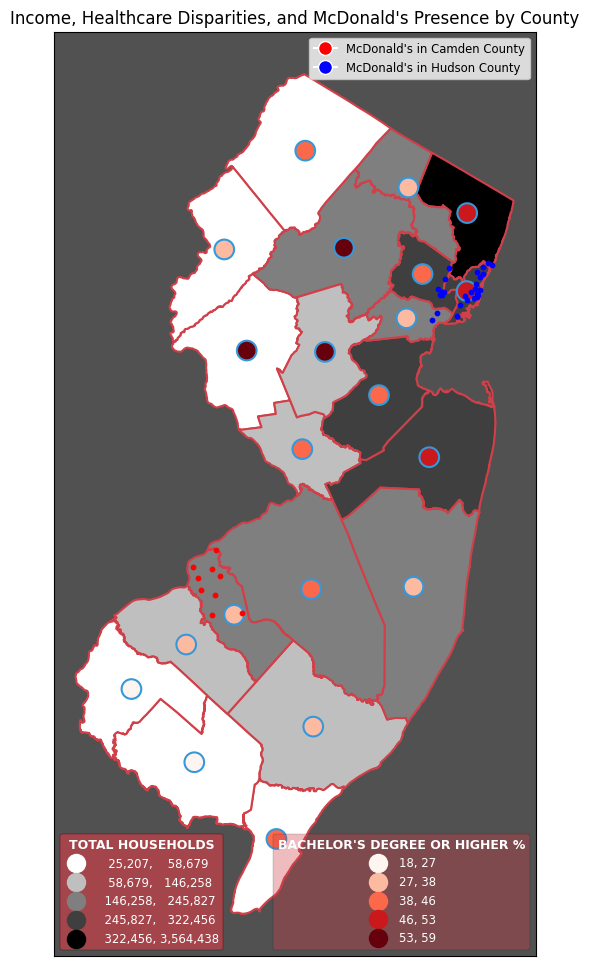

In [128]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from shapely.geometry import Point

# Your current map setup
fig, ax = plt.subplots(1, figsize=(8, 12))
ax.set_facecolor('#525151')  # Background color

# Base shapefile plot with updated county line color
njC3.plot(
    ax=ax,
    column="TOTAL HOUSEHOLDS",
    legend=True,
    cmap='gray_r',
    scheme='natural_breaks',
    k=5,
    edgecolor='#d13f49',  # Custom color for county lines (orange)
    linewidth=1.5,        # Adjusted line width for visibility
    legend_kwds={
        "fmt": "{:,.0f}",
        'loc': 'lower left',
        'title_fontsize': 'medium',
        'fontsize': 'small',
        'markerscale': 1.4
    }
)

# Customize Legend 1
l1 = ax.get_legend()
l1.set_title("TOTAL HOUSEHOLDS")
l1.get_title().set_color('#ffffff')
l1.get_title().set_fontsize(9)
l1.get_title().set_fontweight('bold')
l1.set_frame_on(True)
l1.get_frame().set_linewidth(0.3)
l1.get_frame().set_edgecolor('black')
l1.get_frame().set_facecolor('#d13f49')
l1.get_frame().set_alpha(0.65)
for text in l1.get_texts():
    text.set_color('#ffffff')

# Additional layer for median household income with updated line color
njCentroid.plot(
    ax=ax,
    column="BACHELOR'S DEGREE OR HIGHER PERCENTAGE",
    legend=True,
    cmap='Reds',
    scheme='natural_breaks',
    k=5,
    edgecolor='#3498DB',  # Custom color for county lines (blue)
    linewidth=1.5,        # Adjusted line width for visibility
    legend_kwds={
        "fmt": "{:,.0f}",
        'loc': 'lower right',
        'title_fontsize': 'medium',
        'fontsize': 'small',
        'markerscale': 1.4
    },
    markersize=200
)

# Customize Legend 2
l2 = ax.get_legend()
l2.set_title("BACHELOR'S DEGREE OR HIGHER %")
l2.get_title().set_color('#ffffff')
l2.get_title().set_fontsize(9)
l2.get_title().set_fontweight('bold')
l2.set_bbox_to_anchor((1, 0.0005))  # Adjust position
l2.set_frame_on(True)
l2.get_frame().set_linewidth(0.3)
l2.get_frame().set_edgecolor('black')
l2.get_frame().set_facecolor('#d13f49')
l2.get_frame().set_alpha(0.35)
for text in l2.get_texts():
    text.set_color('#ffffff')

# Overlay the red and blue points
gdf_red.plot(ax=ax, marker='o', color='red', markersize=10, label="Red Points")
gdf_blue.plot(ax=ax, marker='o', color='blue', markersize=10, label="Blue Points")

# Add a custom legend for red and blue points
red_point = Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label="McDonald's in Camden County")
blue_point = Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label="McDonald's in Hudson County")
plt.legend(handles=[red_point, blue_point], loc='upper right', fontsize='small')

# Set the title and remove x/y ticks
ax.set_title("Income, Healthcare Disparities, and McDonald's Presence by County")
ax.set_xticks([])
ax.set_yticks([])

# Add legends to the axis
ax.add_artist(l1)
ax.add_artist(l2)

plt.show()


Scatter plot for Map 3

Text(0.5, 1.0, "BACHELOR'S DEGREE OR HIGHER % by County")

Text(0.5, 0, 'County')

Text(0, 0.5, "BACHELOR'S DEGREE OR HIGHER %")

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 [Text(0, 0, 'HUNTERDON'),
  Text(1, 0, 'SOMERSET'),
  Text(2, 0, 'MORRIS'),
  Text(3, 0, 'BERGEN'),
  Text(4, 0, 'MONMOUTH'),
  Text(5, 0, 'HUDSON'),
  Text(6, 0, 'MIDDLESEX'),
  Text(7, 0, 'MERCER'),
  Text(8, 0, 'BURLINGTON'),
  Text(9, 0, 'SUSSEX'),
  Text(10, 0, 'CAPE MAY'),
  Text(11, 0, 'ESSEX'),
  Text(12, 0, 'UNION'),
  Text(13, 0, 'WARREN'),
  Text(14, 0, 'CAMDEN'),
  Text(15, 0, 'GLOUCESTER'),
  Text(16, 0, 'OCEAN'),
  Text(17, 0, 'ATLANTIC'),
  Text(18, 0, 'PASSAIC'),
  Text(19, 0, 'SALEM'),
  Text(20, 0, 'CUMBERLAND')])

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 [Text(0, 0, 'HUNTERDON'),
  Text(1, 0, 'SOMERSET'),
  Text(2, 0, 'MORRIS'),
  Text(3, 0, 'BERGEN'),
  Text(4, 0, 'MONMOUTH'),
  Text(5, 0, 'HUDSON'),
  Text(6, 0, 'MIDDLESEX'),
  Text(7, 0, 'MERCER'),
  Text(8, 0, 'BURLINGTON'),
  Text(9, 0, 'SUSSEX'),
  Text(10, 0, 'CAPE MAY'),
  Text(11, 0, 'ESSEX'),
  Text(12, 0, 'UNION'),
  Text(13, 0, 'WARREN'),
  Text(14, 0, 'CAMDEN'),
  Text(15, 0, 'GLOUCESTER'),
  Text(16, 0, 'OCEAN'),
  Text(17, 0, 'ATLANTIC'),
  Text(18, 0, 'PASSAIC'),
  Text(19, 0, 'SALEM'),
  Text(20, 0, 'CUMBERLAND')])

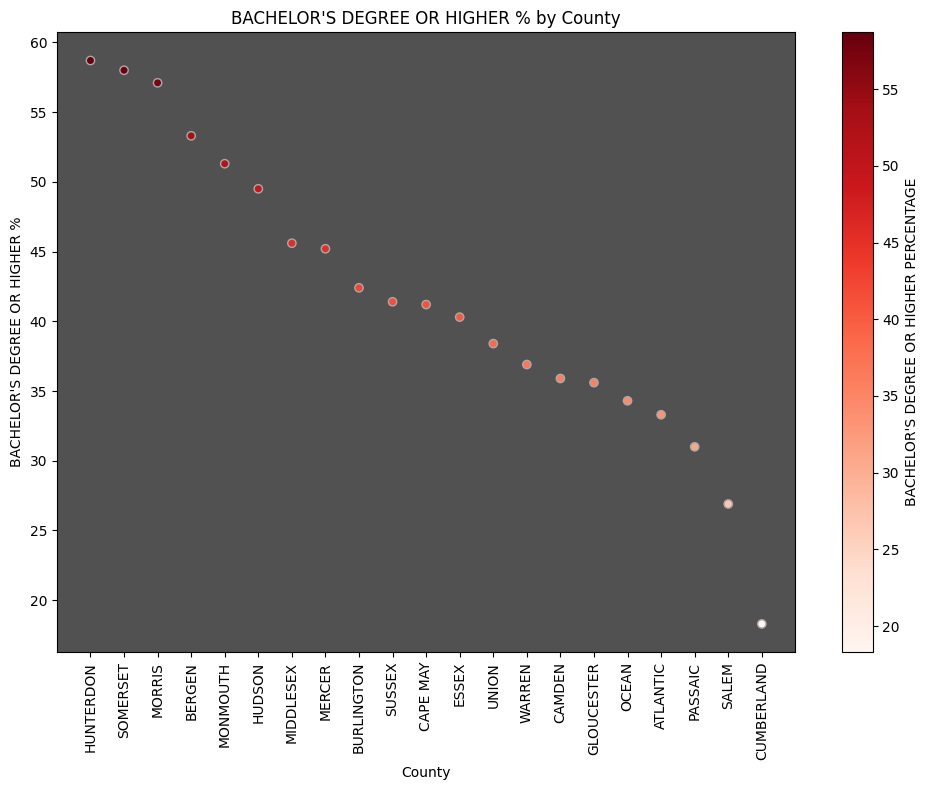

In [151]:
import matplotlib.pyplot as plt
import numpy as np

# Sort the DataFrame by 'POPDEN2010' for better visualization
NjC3_sorted = njC3.sort_values(by="BACHELOR'S DEGREE OR HIGHER PERCENTAGE", ascending=False)

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 8))

# Set the background color of the plot (light gray)
ax.set_facecolor('#525151')

# Create the scatter plot, with x-axis being counties and y-axis being population density
ax.scatter(NjC3_sorted['COUNTY'], NjC3_sorted["BACHELOR'S DEGREE OR HIGHER PERCENTAGE"], c=NjC3_sorted["BACHELOR'S DEGREE OR HIGHER PERCENTAGE"], cmap='Reds', edgecolor='darkgray')

# Add a title and labels
ax.set_title("BACHELOR'S DEGREE OR HIGHER % by County")
ax.set_xlabel('County')
ax.set_ylabel("BACHELOR'S DEGREE OR HIGHER %")

# Rotate the x-axis labels at a 45-degree angle for better readability
plt.xticks(rotation=45)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Add a color bar to represent population density
cbar = plt.colorbar(ax.collections[0], ax=ax)
cbar.set_label("BACHELOR'S DEGREE OR HIGHER PERCENTAGE")

# Display the scatter plot
plt.tight_layout()
plt.show()


In [ ]:
'''
import matplotlib.pyplot as plt

# Sort the DataFrame by 'MEDIAN HOUSEHOLD INCOME' for better visualization
NjC3_sorted = njC3.sort_values(by='MEDIAN HOUSEHOLD INCOME', ascending=False)

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(14, 8))

# Set the background color of the plot (light gray)
ax.set_facecolor('#a3afc2')


# Create a bar chart with outlined bars
bars = ax.bar(NjC3_sorted['COUNTY'], NjC3_sorted['MEDIAN HOUSEHOLD INCOME'], color='teal', edgecolor='black', linewidth=3)


# Plot a bar chart
ax.bar(NjC3_sorted['COUNTY'], NjC3_sorted['MEDIAN HOUSEHOLD INCOME'], color='teal')

# Add title and labels
ax.set_title('Median Household Income by County')
ax.set_xlabel('COUNTY')
ax.set_ylabel('Median Household Income ($)')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Adjust layout for better fit
plt.tight_layout()

# Show the plot
plt.show()
'''

In [ ]:
'''
import matplotlib.pyplot as plt

# Sort the DataFrame by 'MEDIAN HOUSEHOLD INCOME' for better visualization
njC3_sorted = njC3.sort_values(by='MEDIAN HOUSEHOLD INCOME', ascending=False)


# Plot a bar chart
plt.figure(figsize=(14, 8))
plt.bar(njC3_sorted['COUNTY'], njC3_sorted['MEDIAN HOUSEHOLD INCOME'], color='teal')
plt.title('Median Household Income by County')
plt.xlabel('COUNTY')
plt.ylabel('Median Household Income ($)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout for better fit
plt.show()
'''

In [ ]:
'''
import matplotlib.pyplot as plt

# Plot a basic histogram for the column
njC3['WITHOUT HEALTH CARE COVERAGE PERCENTAGE'].plot(kind='hist', bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Health Care Coverage Percentage')
plt.xlabel('Percentage Without Health Care')
plt.ylabel('Frequency')
plt.show()
'''


In [ ]:
'''
njC3['WITHOUT HEALTH CARE COVERAGE PERCENTAGE'].plot(kind='hist', density=True, bins=10, color='green', alpha=0.7)
plt.title('Density Plot of Health Care Coverage Percentage')
plt.xlabel('Percentage Without Health Care')
plt.ylabel('Density')
plt.show()
'''

In [ ]:
'''
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from shapely.geometry import Point

# Your current map setup
fig, ax = plt.subplots(1, figsize=(8, 12))
ax.set_facecolor('#525151')  # Background color

# Base shapefile plot
njC3.plot(ax=ax, column='POPULATION', legend=True, cmap='gray', scheme='natural_breaks', k=5,
          edgecolor='black', linewidth=1,
          legend_kwds={"fmt": "{:,.0f}", 'loc': 'lower left', 'title_fontsize': 'medium',
                       'fontsize': 'small', 'markerscale': 1.4})

# Customize Legend 1
l1 = ax.get_legend()
l1.set_title('Population')
l1.get_title().set_color('#ffffff')
l1.get_title().set_fontsize(9)
l1.get_title().set_fontweight('bold')
l1.set_frame_on(True)
l1.get_frame().set_linewidth(0.3)
l1.get_frame().set_edgecolor('black')
l1.get_frame().set_facecolor('#ff6200')
l1.get_frame().set_alpha(0.65)
for text in l1.get_texts():
    text.set_color('#ffffff')

# Additional layer for median household income
njCentroid.plot(ax=ax, column='MEDIAN HOUSEHOLD INCOME', legend=True, cmap='Greens', scheme='natural_breaks', k=5,
                edgecolor='black', linewidth=1,
                legend_kwds={"fmt": "{:,.0f}", 'loc': 'lower right', 'title_fontsize': 'medium',
                             'fontsize': 'small', 'markerscale': 1.4},
                markersize=200)

# Customize Legend 2
l2 = ax.get_legend()
l2.set_title('Median Household Income ($)')
l2.get_title().set_color('#ffffff')
l2.get_title().set_fontsize(9)
l2.get_title().set_fontweight('bold')
l2.set_bbox_to_anchor((1, 0.0005))  # Adjust position
l2.set_frame_on(True)
l2.get_frame().set_linewidth(0.3)
l2.get_frame().set_edgecolor('black')
l2.get_frame().set_facecolor('#ff6200')
l2.get_frame().set_alpha(0.35)
for text in l2.get_texts():
    text.set_color('#ffffff')

# Overlay the red and blue points
gdf_red.plot(ax=ax, marker='o', color='red', markersize=10, label="Red Points")
gdf_blue.plot(ax=ax, marker='o', color='blue', markersize=10, label="Blue Points")

# Add a custom legend for red and blue points
red_point = Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label="McDonald's in Camden County")
blue_point = Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label="McDonald's in Hudson County")
plt.legend(handles=[red_point, blue_point], loc='upper right', fontsize='small')


# Set the title and remove x/y ticks
ax.set_title("Population Median Income Centroid")
ax.set_xticks([])
ax.set_yticks([])

# Add legends to the axis
ax.add_artist(l1)
ax.add_artist(l2)

plt.show()
'''

# **ANALYSIS**

* this should be after the maps and just include some talking points about what we can really make of this data

* Can include things such as code snippets clusters of maps to drive these points through

Centroid Map
  * Population Median Income
    -

Side by Side Analysis
  * We can see that


# **FUTURE ENHANCEMENTS**

* color this to make it similiar to my plant wiki idea, see if colab can even do this
* make the maps pretty
* interactive maps? sliding scale to see year by year data and the changes that go in, see if there is any insights to be made

**SAVE MY IMAGES AS AN IMAGE TYPE AND UPLOAD TO A CELL**
 - this way it is easier to go through and don't have to worry about code errors on run time presentation

# References

https://www-doh.nj.gov/doh-shad/indicator/view/FoodInsecurity.CoAll.html


https://www.ers.usda.gov/data-products/food-environment-atlas/go-to-the-atlas/

https://data.census.gov/profile?q=%20New%20Jersey%20Income%20and%20Pover


https://matplotlib.org/stable/index.html

https://geopandas.org/en/stable/docs.html

https://www.arcgis.com/home/item.html?id=8f34314be4a34719a8d046d0ab3ba148#data

https://www.city-data.com/locations/McDonalds/Camden-County-NJ.html

https://www.nass.usda.gov/Publications/AgCensus/2022/Online_Resources/County_Profiles/New_Jersey/cp99034.pdf

https://www.nass.usda.gov/Publications/AgCensus/2022/Full_Report/Volume_1,_Chapter_2_County_Level/New_Jersey/st34_2_008_008.pdf

# **RESOURCES**

URLS for datasets:
*
*
*

Color themes(CASE_sensitive):
* cmap = ['magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'turbo', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'magma_r', 'inferno_r', 'plasma_r', 'viridis_r', 'cividis_r', 'twilight_r', 'twilight_shifted_r', 'turbo_r', 'Blues_r', 'BrBG_r', 'BuGn_r', 'BuPu_r', 'CMRmap_r', 'GnBu_r', 'Greens_r', 'Greys_r', 'OrRd_r', 'Oranges_r', 'PRGn_r', 'PiYG_r', 'PuBu_r', 'PuBuGn_r', 'PuOr_r', 'PuRd_r', 'Purples_r', 'RdBu_r', 'RdGy_r', 'RdPu_r', 'RdYlBu_r', 'RdYlGn_r', 'Reds_r', 'Spectral_r', 'Wistia_r', 'YlGn_r', 'YlGnBu_r', 'YlOrBr_r', 'YlOrRd_r', 'afmhot_r', 'autumn_r', 'binary_r', 'bone_r', 'brg_r', 'bwr_r', 'cool_r', 'coolwarm_r', 'copper_r', 'cubehelix_r', 'flag_r', 'gist_earth_r', 'gist_gray_r', 'gist_heat_r', 'gist_ncar_r', 'gist_rainbow_r', 'gist_stern_r', 'gist_yarg_r', 'gnuplot_r', 'gnuplot2_r', 'gray_r', 'hot_r', 'hsv_r', 'jet_r', 'nipy_spectral_r', 'ocean_r', 'pink_r', 'prism_r', 'rainbow_r', 'seismic_r', 'spring_r', 'summer_r', 'terrain_r', 'winter_r', 'Accent_r', 'Dark2_r', 'Paired_r', 'Pastel1_r', 'Pastel2_r', 'Set1_r', 'Set2_r', 'Set3_r', 'tab10_r', 'tab20_r', 'tab20b_r', 'tab20c_r']

* My favorites (non color names seem to be better if using categorical data, colors are great for sliding scale data numbericals)(ones like ocean are great, 0 value is green and all others are blue, really helps drive how some disparirty there is in data): ['viridis','cividis','twilight','Blues','BuGn', 'Greys','binary','Wistia','autumn','bone','cool','copper','flag','gist_earth','gist_gray','gist_ncar','hsv','ocean','prism','rainbow','seismic','winter','Pastel1','Pastel2','']
* can i use additional libraries for color libraries?

In [ ]:
print(plt.colormaps())


['magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'turbo', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'magma_r', 'inferno_r', 'plasma_r', 'viridis_r', 'cividis_r', 'twilight_r', 'twilight_shifted_r', 'turbo_r', 'Blues_r', 'BrBG_r', 'BuGn_r', 'BuPu_r', 'CMRmap_r', 'GnBu_r', 'G

# **ERRORS**

## DEBUG (WORKS)

### this was how I check for missing geometries on my files, this was necessary for me to add the county names in my map portion with this code snippet:
    
    # Add county names on the map
    njC2.apply(lambda x: ax.text(x.geometry.centroid.x, x.geometry.centroid.y,x['COUNTY'], fontsize=8, ha='center'), axis=1)


In [ ]:
print(njC2[njC2.geometry.isnull()])


Empty GeoDataFrame
Columns: [COUNTY, COUNTY_LAB, CO, GNIS_NAME, GNIS, FIPSSTCO, FIPSCO, ACRES, SQ_MILES, POP2010, POP2000, POP1990, POP1980, POPDEN2010, POPDEN2000, POPDEN1990, POPDEN1980, REGION, Shape_Leng, Shape_Area, geometry, HEALTHY FOOD, Exercise Opportunities, Obese Persons, Physically Inactive Persons, Children Eligible for Free Lunch, _merge]
Index: []

[0 rows x 27 columns]


In [ ]:
njC2 = njC2[~njC2.geometry.isnull()]

In [ ]:
njC2 = njC2.to_crs(epsg=3857)  # Using Web Mercator (EPSG:3857) as an example


Sometimes merging, atleast for this dataset, I still had to strip again columns. May have to do that everytime you are working with a 'new' dataframe, even if it is building upon an 'old' df.

## DOES NOT WORK                                                            

Side by Side with multi Maps - Note there seems to be issues with this trying to use NJc3 for some reason

In [ ]:
#print(njC3.empty)


In [ ]:
#print(njC3.columns)
#print(njC3[['FAST FOOD RESTAURANTS 2011 COUNT', 'HEALTHY FOOD']].head())

In [ ]:
'''
#side-by-side: subplots 1row,2col; then just axs[0] and axs[1]
fig, axs = plt.subplots(1,2, figsize=(10,10),sharey=True, tight_layout=True)
njC2.plot(ax=axs[0],column='FAST FOOD RESTAURANTS 2011 COUNT',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=0.2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #
axs[0].title.set_text("FAST FOOD RESTAURANTS 2011 COUNT")
axs[0].set_xticks([]); axs[0].set_yticks([])


njC2.plot(ax=axs[1],column='HEALTHY FOOD',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=0.2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #

njC2.apply(lambda x: axs[0].text(x.geometry.centroid.x, x.geometry.centroid.y,
                             x['COUNTY'], fontsize=8, ha='center'))

axs[1].title.set_text("HEALTHY FOOD	")
axs[1].set_xticks([]); axs[1].set_yticks([])
'''


In [ ]:
njC3.dtypes

Bucket mapping

In [ ]:
'''
# Create a new column categorizing the income
bins = [0, 50000, 70000, 90000, 120000]
labels = ['0-50k', '50k-70k', '70k-90k', '90k-120k']
#njC3['MEDIAN HOUSEHOLD INCOME'] = pd.cut(njC3['MEDIAN HOUSEHOLD INCOME'], bins=bins, labels=labels, include_lowest=True)

# Map the income ranges to colors
color_map = {
    '0-50k': 'lightblue',
    '50k-70k': 'skyblue',
    '70k-90k': 'dodgerblue',
    '90k-120k': 'navy'
}


# Add county names on the map
njC3_copy.apply(lambda x: ax.text(x.geometry.centroid.x, x.geometry.centroid.y,
                             x['COUNTY'], fontsize=8, ha='center', color = '#e6f032', fontweight = 'bold'), axis=1)

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
njC3_copy.plot(column='MEDIAN HOUSEHOLD INCOME', cmap='GnBu', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Customize the legend
legend = ax.get_legend()
legend.set_bbox_to_anchor((1, 0.15))  # Position legend at the bottom right
#legend.set_frame_on(False)         # Optional: remove the legend frame
legend_labels = {'0-50k': '0 - 50,000', '50k-70k': '50,001 - 70,000', '70k-90k': '70,001 - 90,000', '90k-120k': '90,001 - 120,000'}
for text in ax.get_legend().get_texts():
    label_text = text.get_text()
    if label_text in legend_labels:
        text.set_text(legend_labels[label_text])

plt.title("Income Ranges")
plt.show()
'''

NameError: name 'njC3_copy' is not defined

## Side by side map 2 - NEED TO DEBUG

In [ ]:
njC3.dtypes

In [ ]:
njC3["FAST FOOD RESTAURANTS 2016 COUNT"]

In [ ]:
njC3["PHYSICALLY INACTIVE PERSONS"]

In [ ]:
njC1["PHYSICALLY INACTIVE PERSONS"]

In [ ]:
njFF = njC1

In [ ]:
njFF = njFF.reset_index(drop=True)


In [ ]:
# RUN JUST ONCE
# Drop rows with even indices
'''njFF_filtered = njFF[njFF.index % 2 != 0]'''



In [ ]:
print(njFF_filtered)

In [ ]:
njFF_filtered["PHYSICALLY INACTIVE PERSONS"]

In [ ]:
njFF_filtered.dtypes

In [ ]:
# Fill NaN values with a default value (e.g., 0)
njFF_filtered['PHYSICALLY INACTIVE PERSONS'] = njFF_filtered['PHYSICALLY INACTIVE PERSONS'].fillna(0)

# Now convert to int64
njFF_filtered['PHYSICALLY INACTIVE PERSONS'] = njFF_filtered['PHYSICALLY INACTIVE PERSONS'].astype('int64')

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(18, 10))

# Plot the first map

njFF_filtered.plot(column='PHYSICALLY INACTIVE PERSONS',  # Replace 'column1' with the column name you want to plot
         cmap='OrRd', legend=True, scheme='natural_breaks', k=5, edgecolor='black',linewidth=1,
         ax=axes[0])
axes[0].set_title('PHYSICALLY INACTIVE PERSONS')


'''
njC3.plot(ax=ax,column='FAST FOOD RESTAURANTS 2011 COUNT',legend=True,cmap='Reds',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower left','title_fontsize':'medium','fontsize':'small','markerscale':1.4})
axes[0].set_title('FAST FOOD RESTAURANTS 2011 COUNT NJ')
'''

# Plot the second map
njFF_filtered.plot(column='FAST FOOD RESTAURANTS 2016 COUNT',  # Replace 'column2' with the other column name you want to plot
         cmap='OrRd',  # Color map for the second plot
         legend=True, scheme='natural_breaks', k=5, edgecolor='black',linewidth=1,
         ax=axes[1])
axes[1].set_title('FAST FOOD RESTAURANTS 2016 COUNT')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()